# British Airways Flight Booking Prediction

### Here is the background information on your task

- Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

- This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

- With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

### Here is your task

1. Explore and prepare the dataset 

    First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

2. Train a machine learning model

    When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

3. Evaluate model and present findings

    After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

It is recommended that the analysis portion of this task is done in Python.

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  2.0.3
seaborn version :  0.12.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='Latin1')

#### Load Dataset (Jupyter Notebook)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('customer_booking.csv', encoding='Latin1')

# Descriptive Statistics

In [4]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#Checking dataframe samples
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
45015,2,Internet,RoundTrip,28,6,12,Mon,DPSHGH,China,0,0,1,5.07,0
41758,2,Internet,RoundTrip,50,5,13,Wed,PERSBW,Malaysia,1,1,0,5.62,1
643,1,Mobile,RoundTrip,38,71,9,Thu,AKLKUL,New Zealand,1,0,0,8.83,0
45061,1,Internet,RoundTrip,228,6,2,Tue,DPSHGH,China,0,0,0,5.07,0
29301,1,Internet,RoundTrip,59,3,3,Tue,TPETWU,Taiwan,0,0,0,4.67,0
13683,2,Internet,RoundTrip,7,70,3,Fri,ICNMEL,South Korea,1,1,1,8.83,0
47743,1,Mobile,RoundTrip,4,6,16,Wed,JEDMFM,Saudi Arabia,0,0,0,9.50,0
38674,1,Mobile,RoundTrip,36,5,10,Thu,HNDKBR,Malaysia,1,0,0,7.57,1
1829,1,Internet,RoundTrip,66,223,0,Fri,AKLKUL,Malaysia,1,1,1,8.83,0
22668,3,Internet,RoundTrip,198,36,9,Wed,PENPVG,China,1,1,1,5.33,0


In [6]:
#Checking missing values
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
#Checking if there is any duplicated values
df.duplicated().any()

True

In [8]:
#Checking amount of duplicated values
df.duplicated().sum()

719

In [9]:
#Checking significance of duplicated values to dataset
df.duplicated().sum() / df.shape[0] * 100

1.438

In [10]:
#Drop duplicated values keeping only the first occurance
df.drop_duplicates(inplace=True)

In [11]:
#Grouping columns based on their types

nums = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

cats = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [12]:
#Numerical description
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


In [13]:
#Categorical description
df.describe(exclude=['int64', 'float64']).transpose()

,count,unique,top,freq
sales_channel,49281,2,Internet,43917
trip_type,49281,3,RoundTrip,48779
flight_day,49281,7,Mon,7988
route,49281,799,AKLKUL,2620
booking_origin,49281,104,Australia,17691


In [14]:
#Categorical feature value counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk sales_channel :
sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64 

Value counts untuk trip_type :
trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64 

Value counts untuk flight_day :
flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64 

Value counts untuk route :
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64 

Value counts untuk booking_origin :
booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Ja

# Univariate Analysis

## Numerical Columns

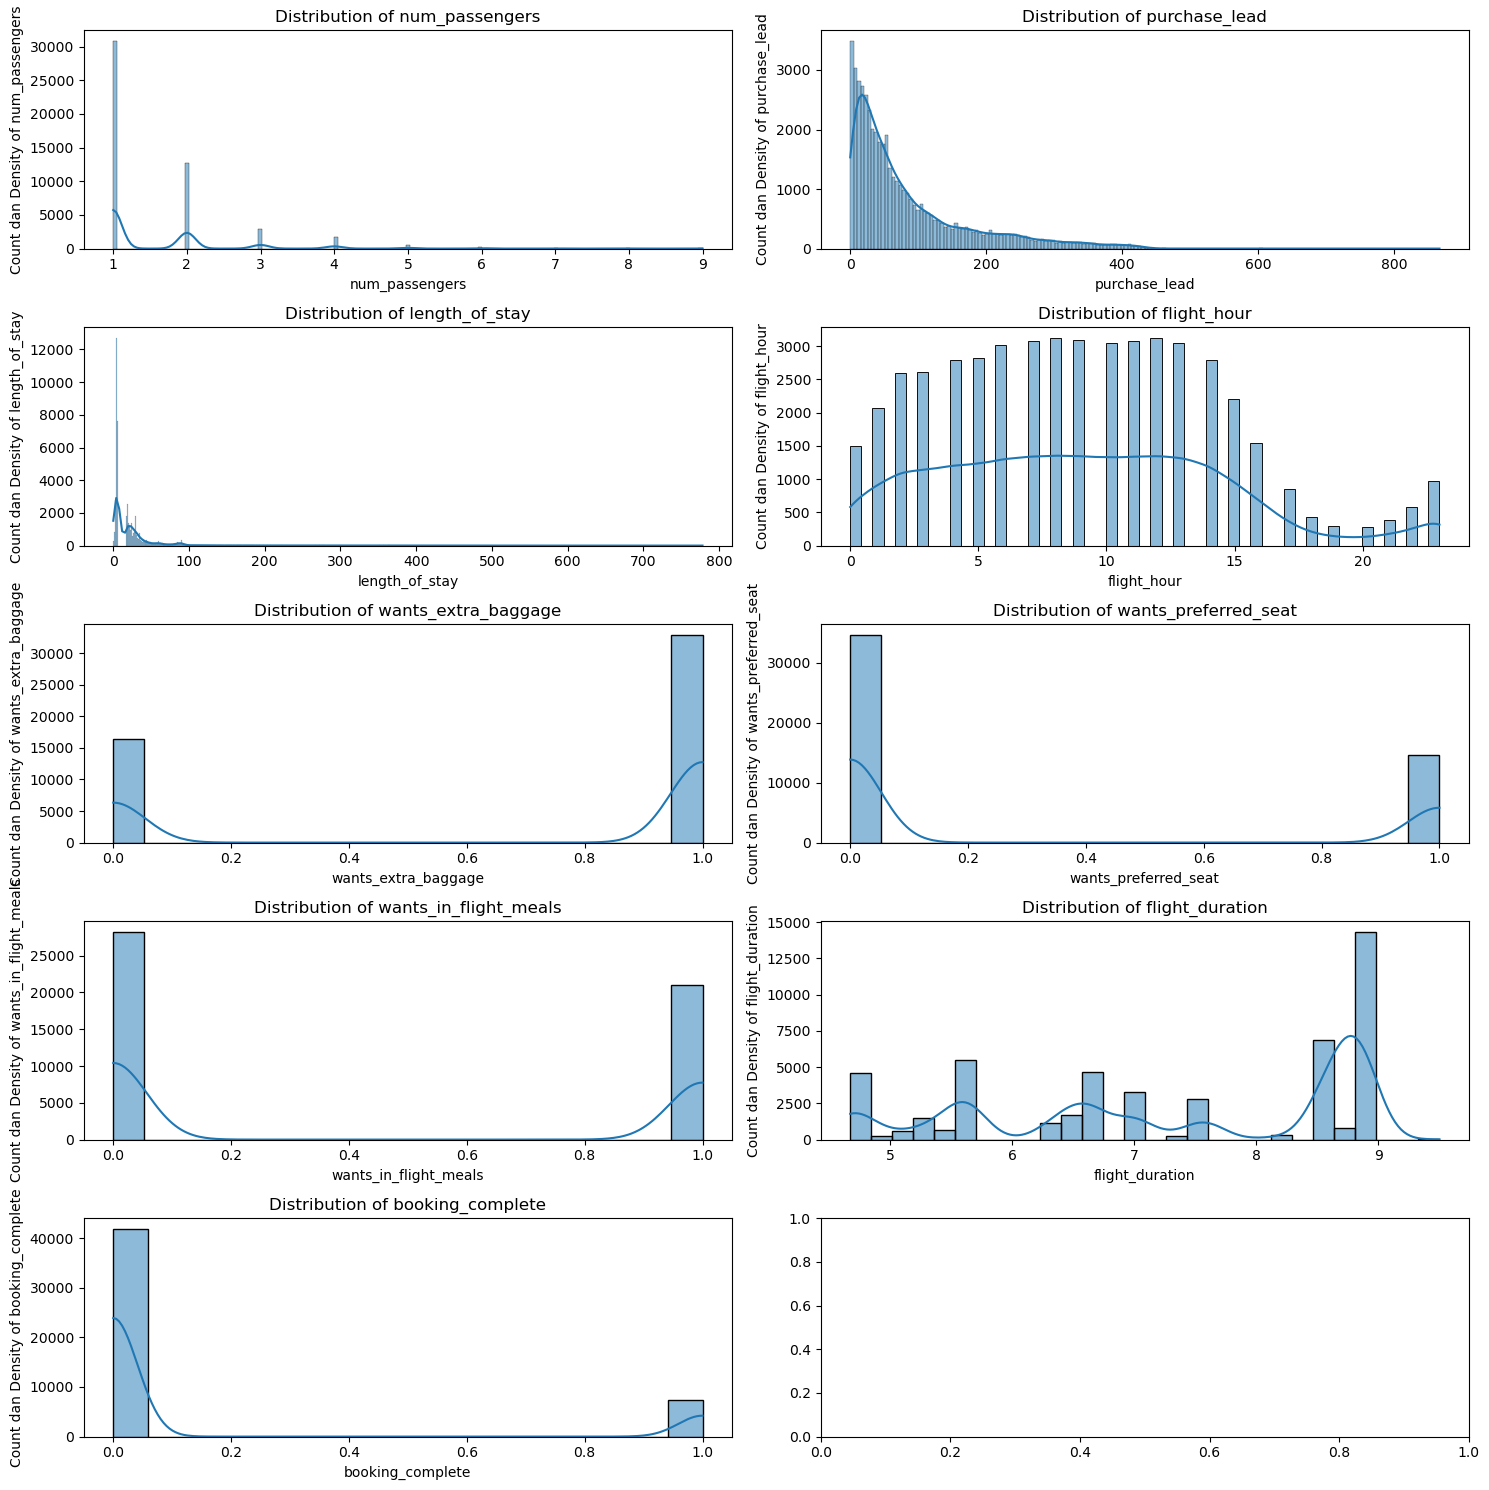

In [15]:
# Hisplot with kde
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

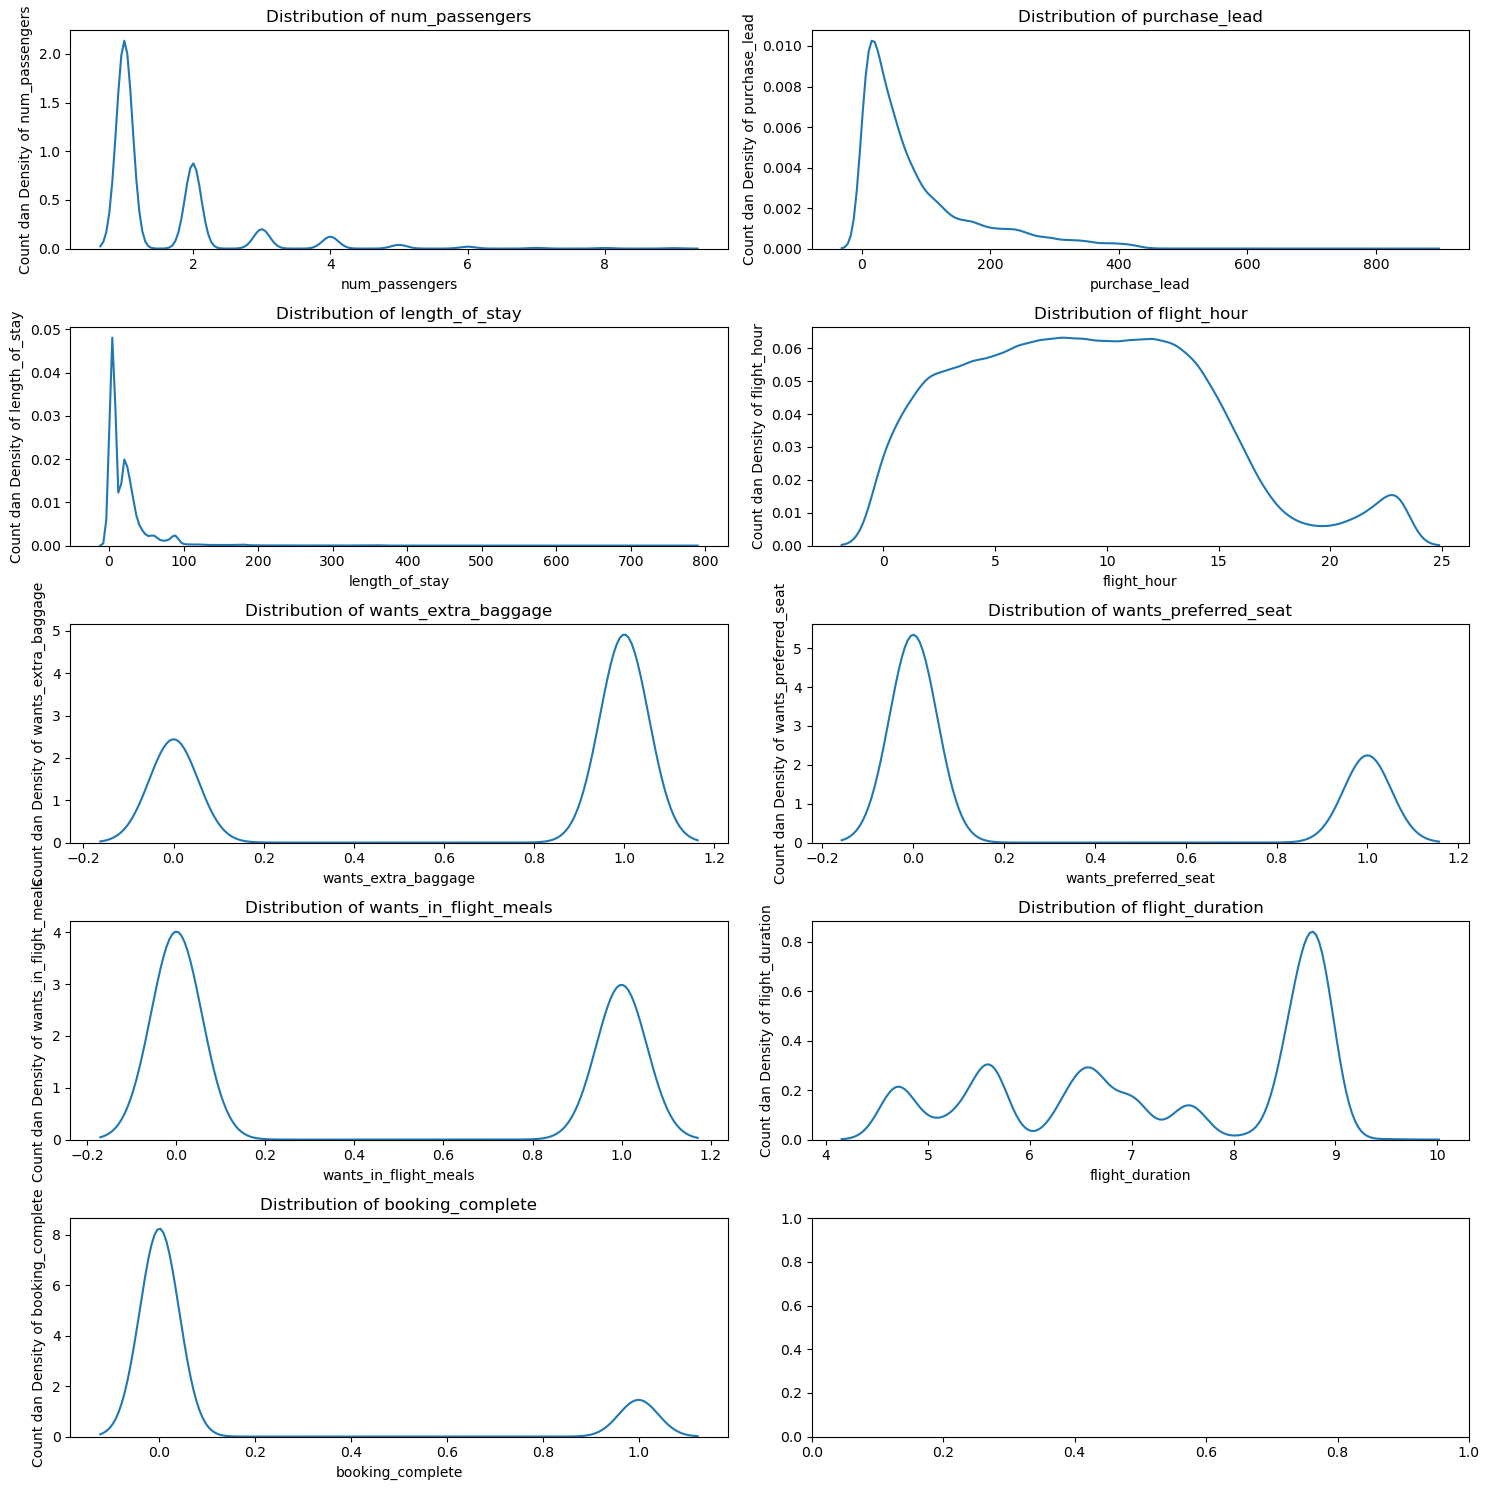

In [16]:
# Focusing on kde
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

The distribution of several categorical features are bimodal, while for the num_passengers, purchase_lead and lenght_of_stay have positive/right skewed distribution, we will filter this whether using standarization or log transformation

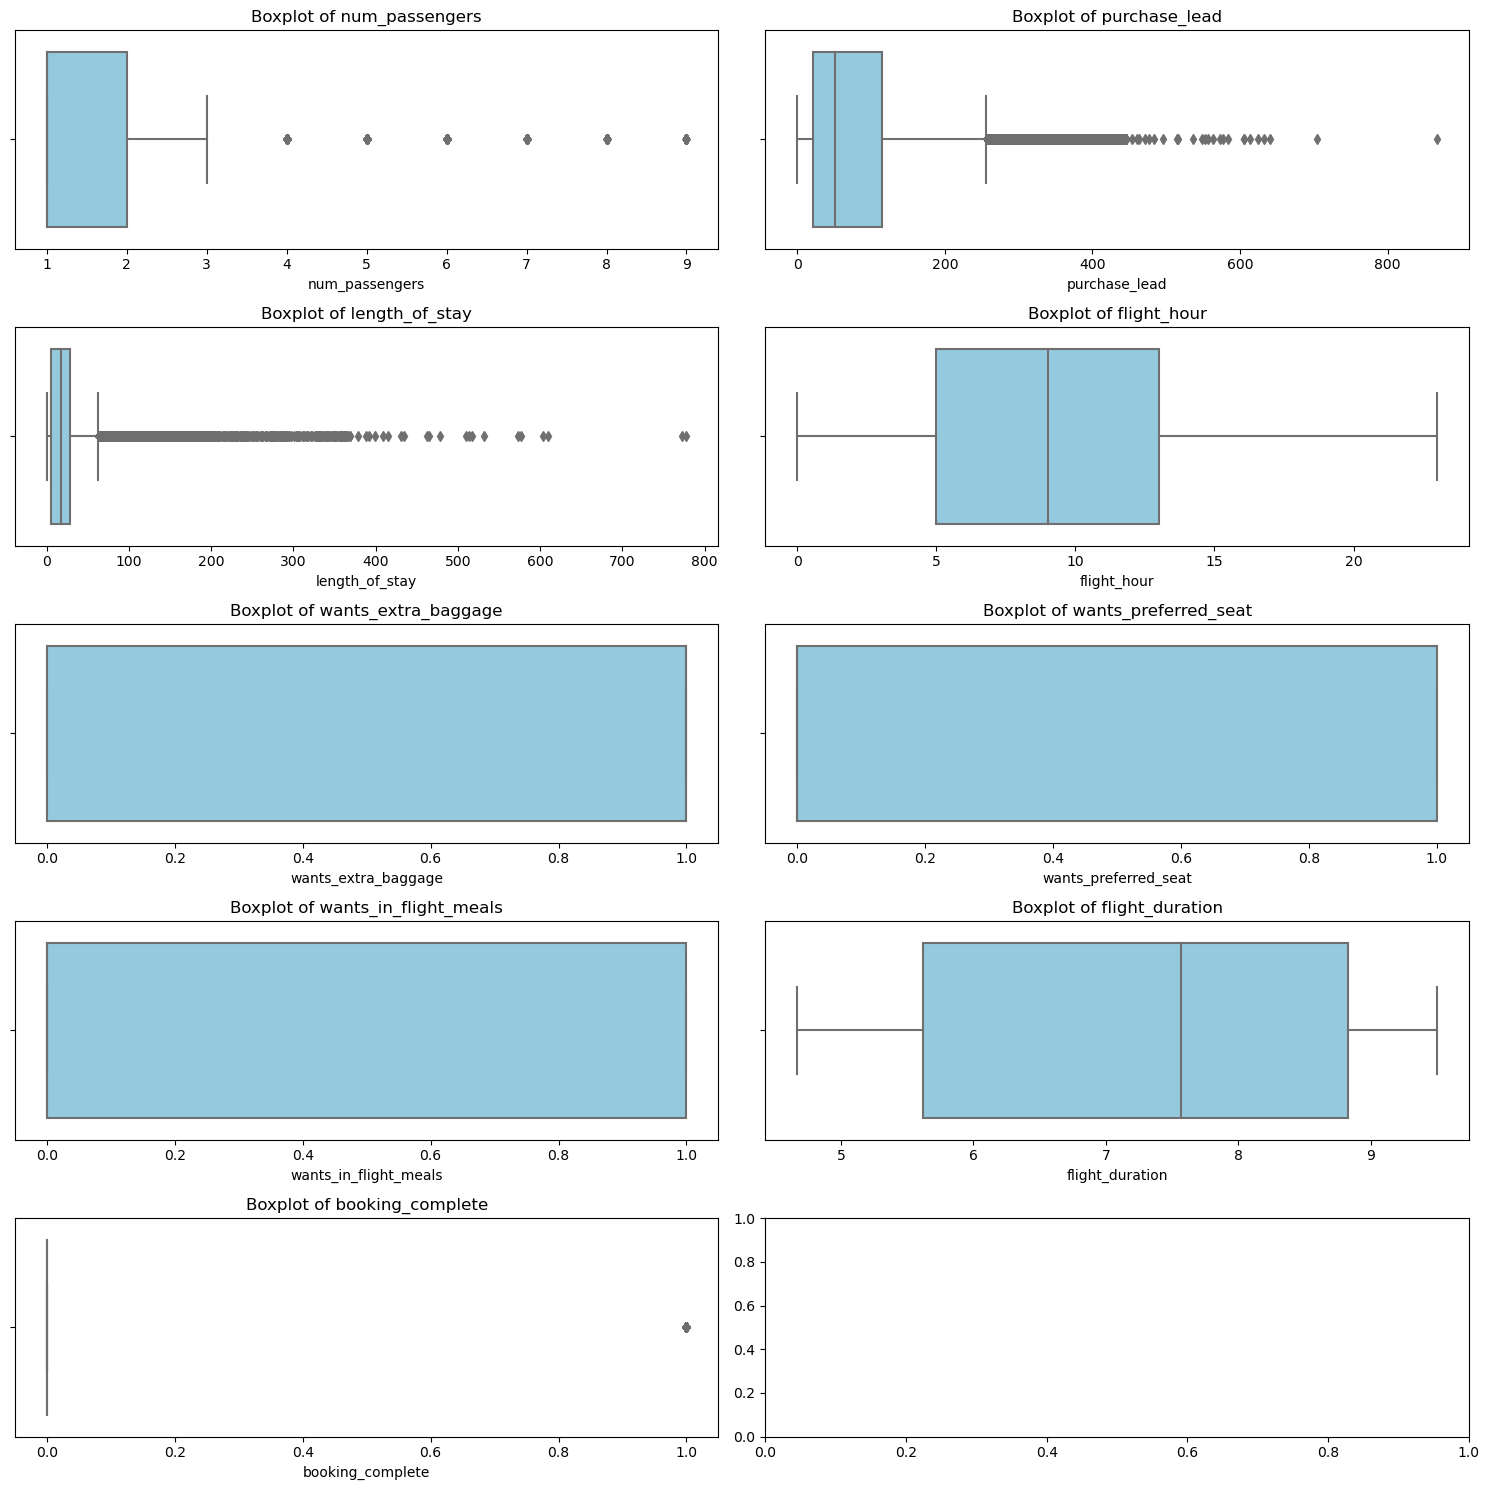

In [17]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

plt.tight_layout()

First we can see that there are quite amount of outliers in num_passengers, purchase_lead and lenght_of_stay feature, so we might filter them later using IQR or Z-Score

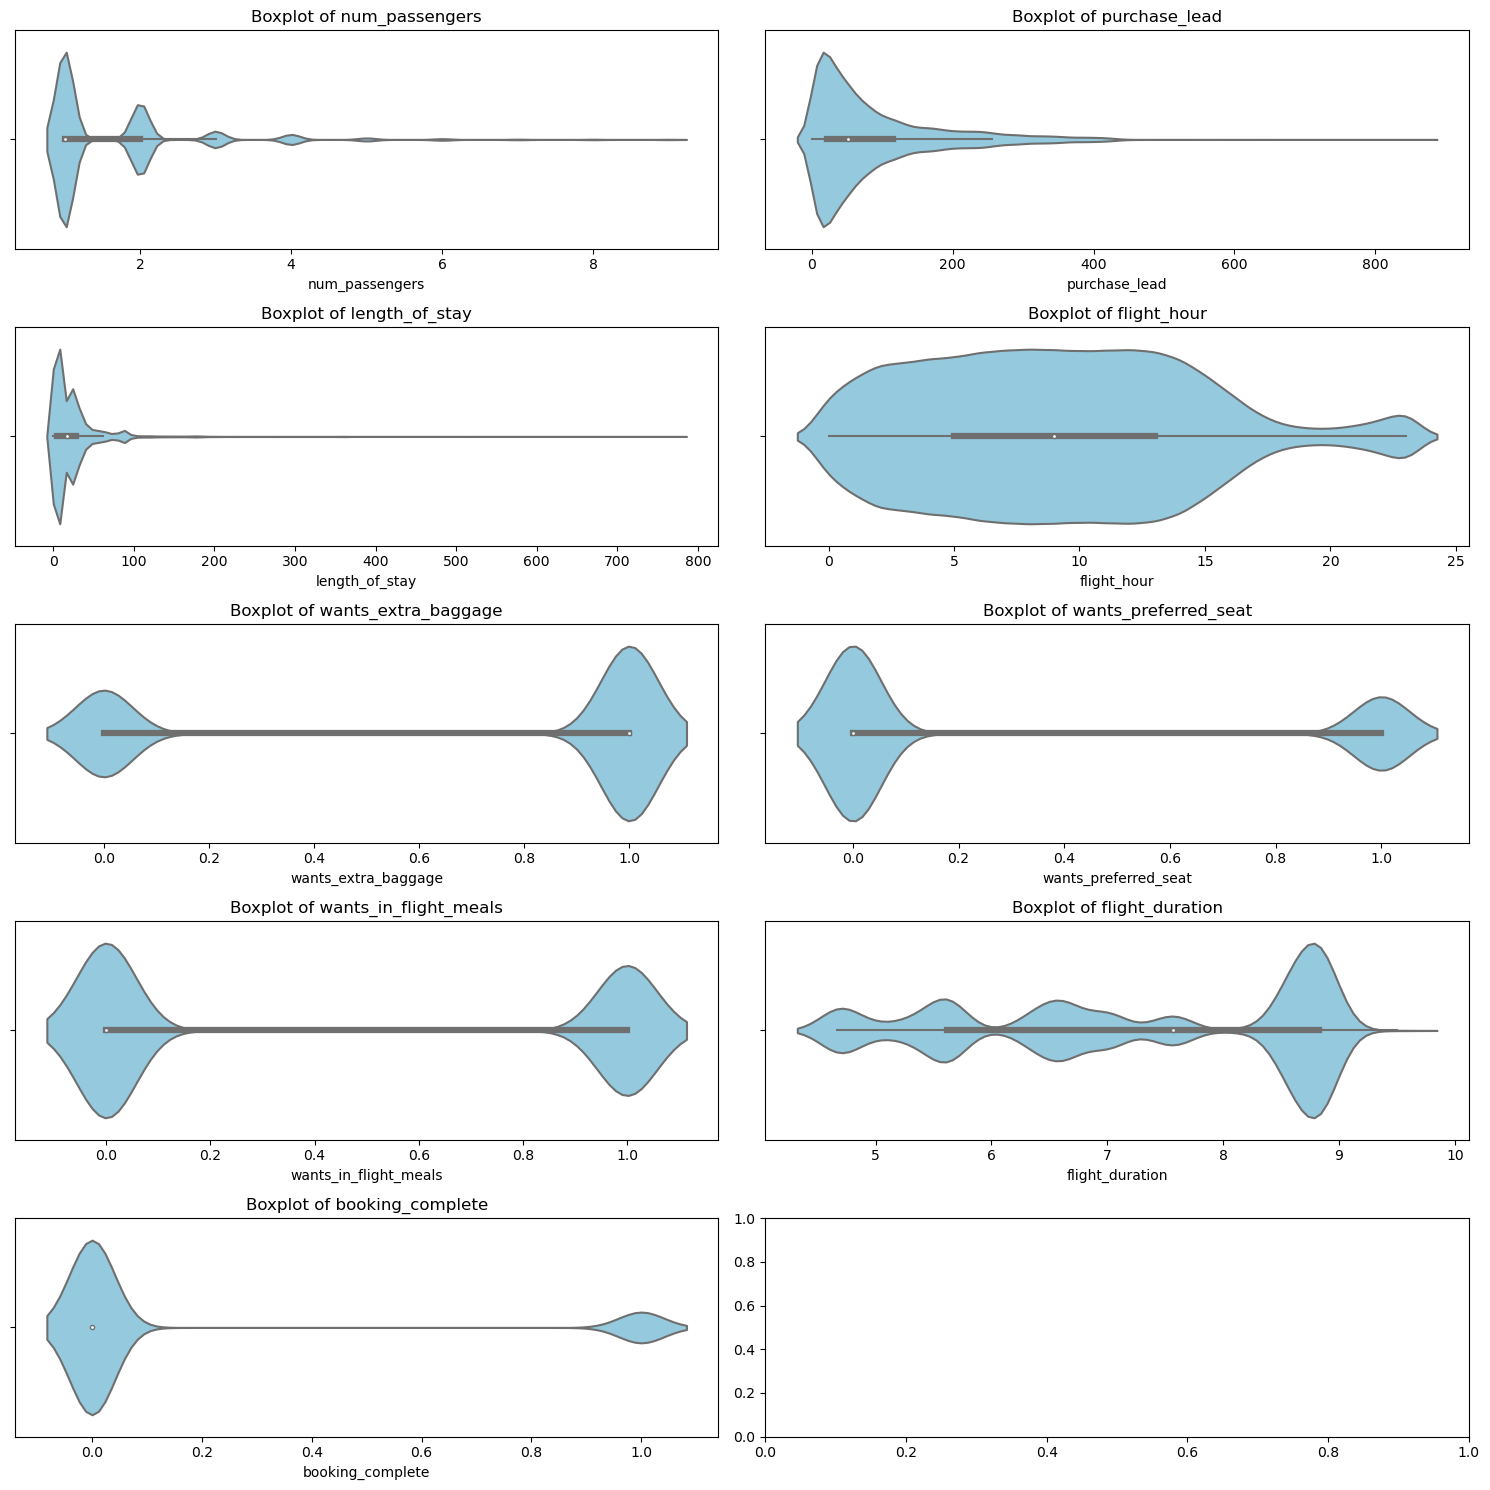

In [18]:
# Violinplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

plt.tight_layout()

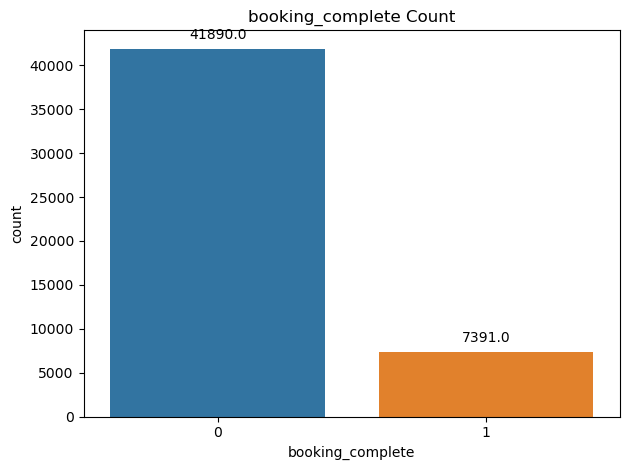

In [19]:
# Univariate booking_complete Only
ax = sns.countplot(data=df, x='booking_complete')

# Annotation of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('booking_complete Count')
plt.tight_layout()
plt.show()

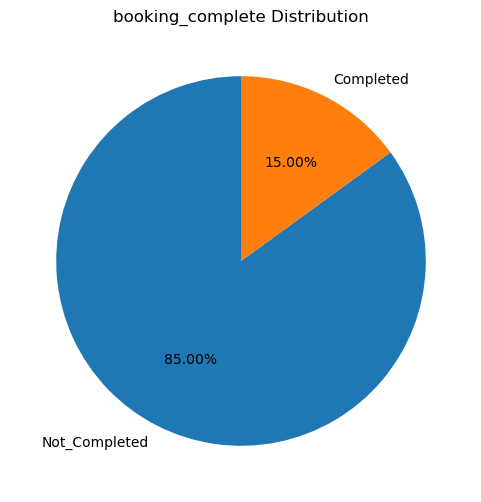

In [20]:
# Creating a pie chart with percentages
plt.figure(figsize=(6, 6))
plt.pie(df['booking_complete'].value_counts(), labels=['Not_Completed', 'Completed'], autopct='%1.2f%%', startangle=90)
plt.title('booking_complete Distribution')

plt.show()

As we can that there is quite an class imbalance case here, where the values completed (1) only have 14.96% of total dataset. So in this case we might use sampling method later 

## Categorical Columns

In [21]:
df[cats].columns

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

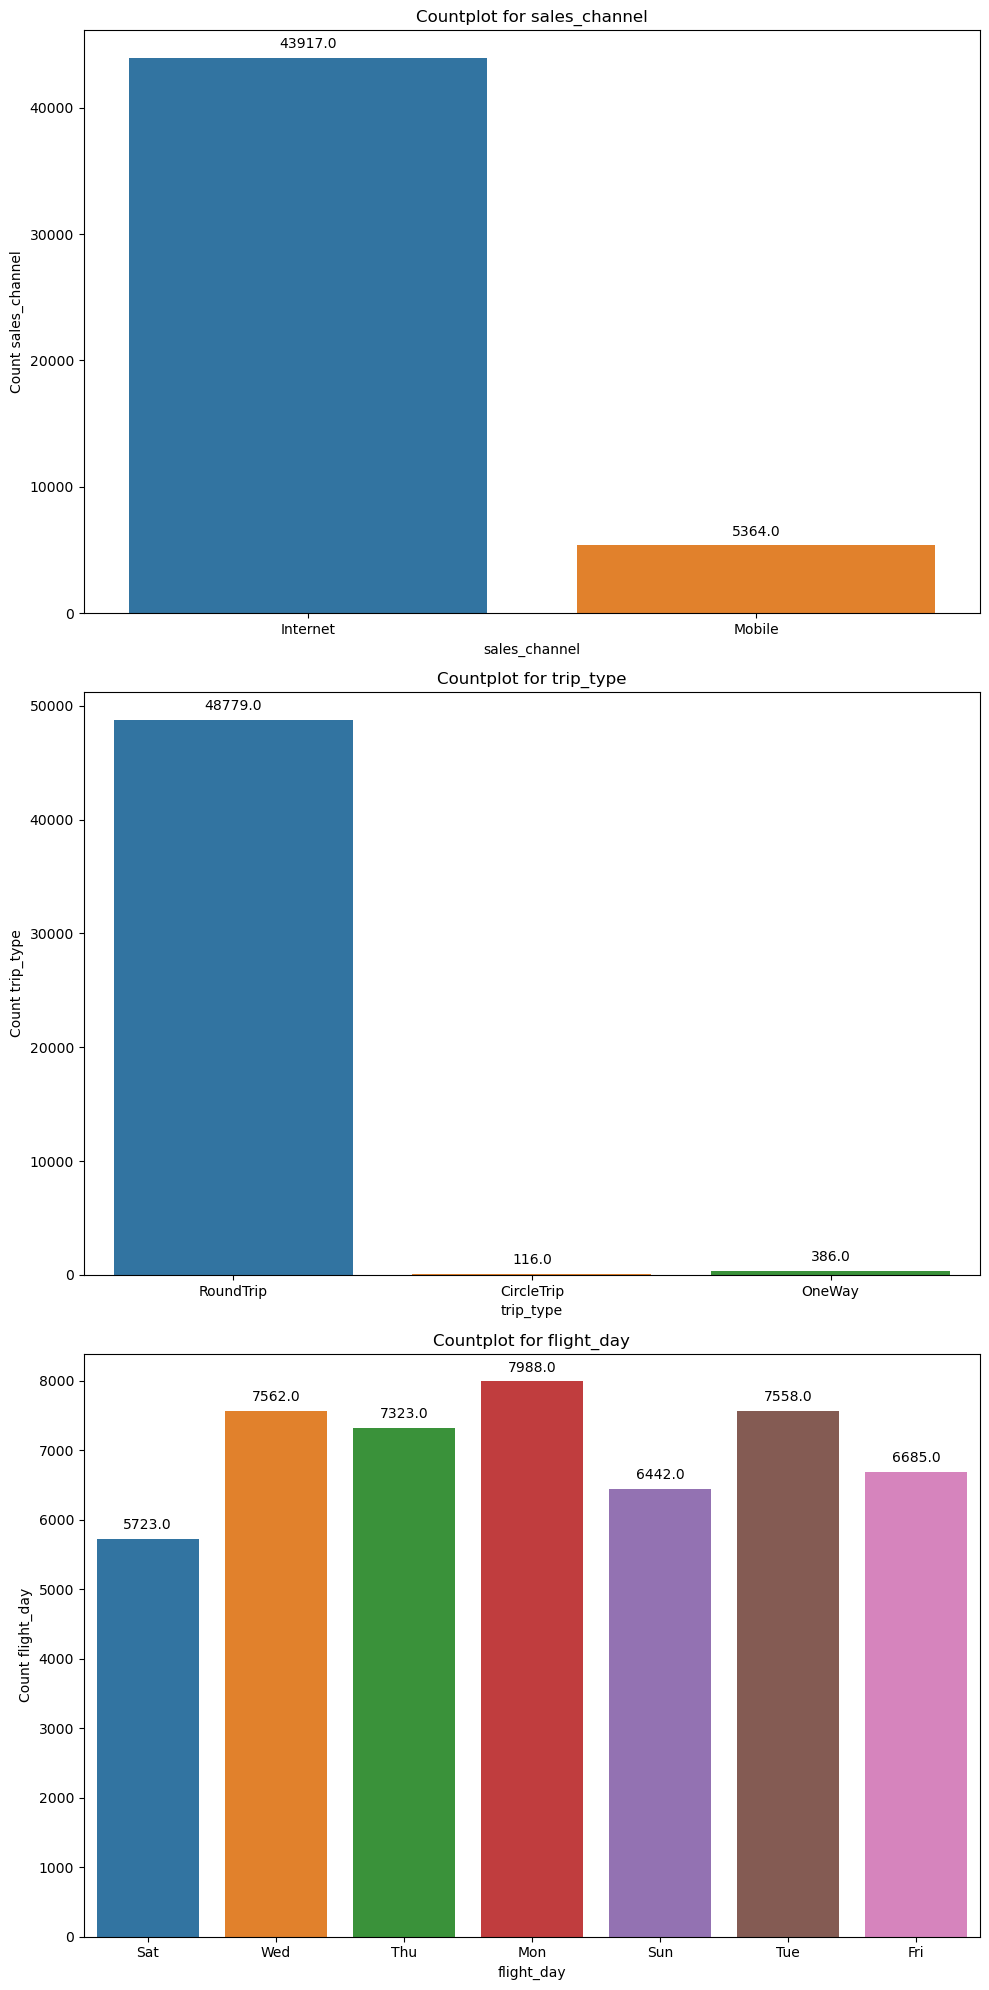

In [25]:
# Categorical Countplot (few unique values)
cats_few = ['sales_channel', 'trip_type', 'flight_day']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]])
    axes[i].set_title(f'Countplot for {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is quite an imbalance in the values of feature sales_channel and trip_type where one category overwhelm the others, we will see it with hue of booking_complete later in the bivariate analysis

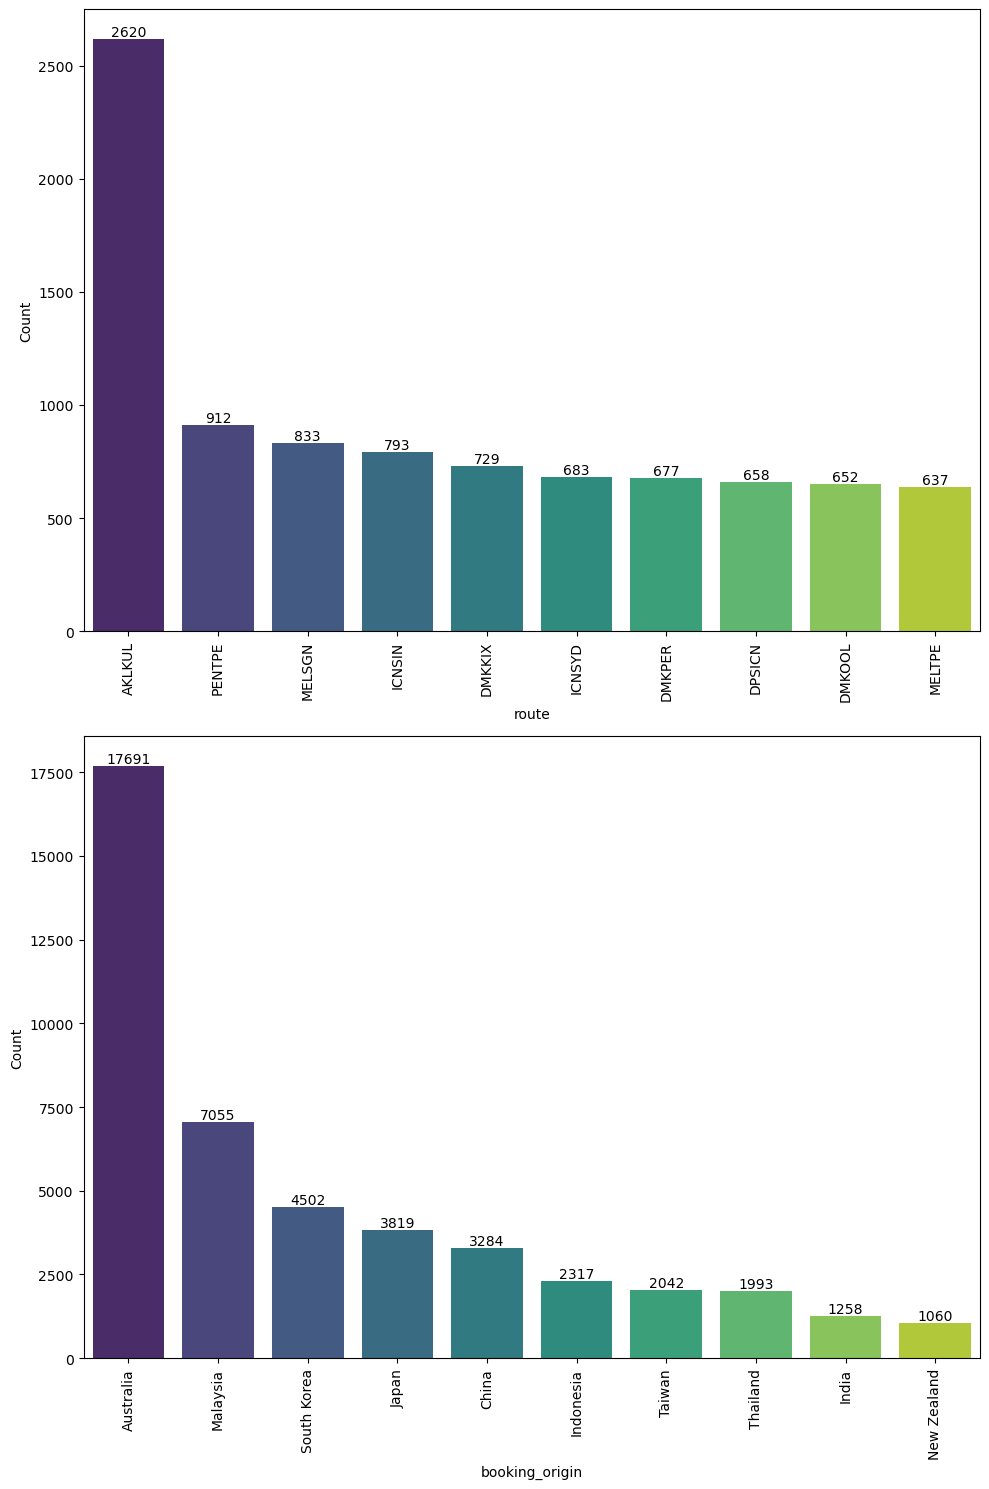

In [31]:
# Categorical Countplot (many unique values)
cats_many = ['route', 'booking_origin']
plt.figure(figsize=(10, 15))

for i in range(len(cats_many)):
    plt.subplot(len(cats_many), 1, i+1)
    top_10_data = df[cats_many[i]].value_counts().head(10)

    # Create countplot
    sns.barplot(x=top_10_data.index, y=top_10_data.values, palette='viridis')

    # Add count values on top of each bar
    for index, value in enumerate(top_10_data.values):
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel(cats_many[i])
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

For categorical feature with many unique values since it is almost impossible to see the entire visualization, we will only make it top 10 or bottom 10 

# Bivariate/Multivariate Analysis

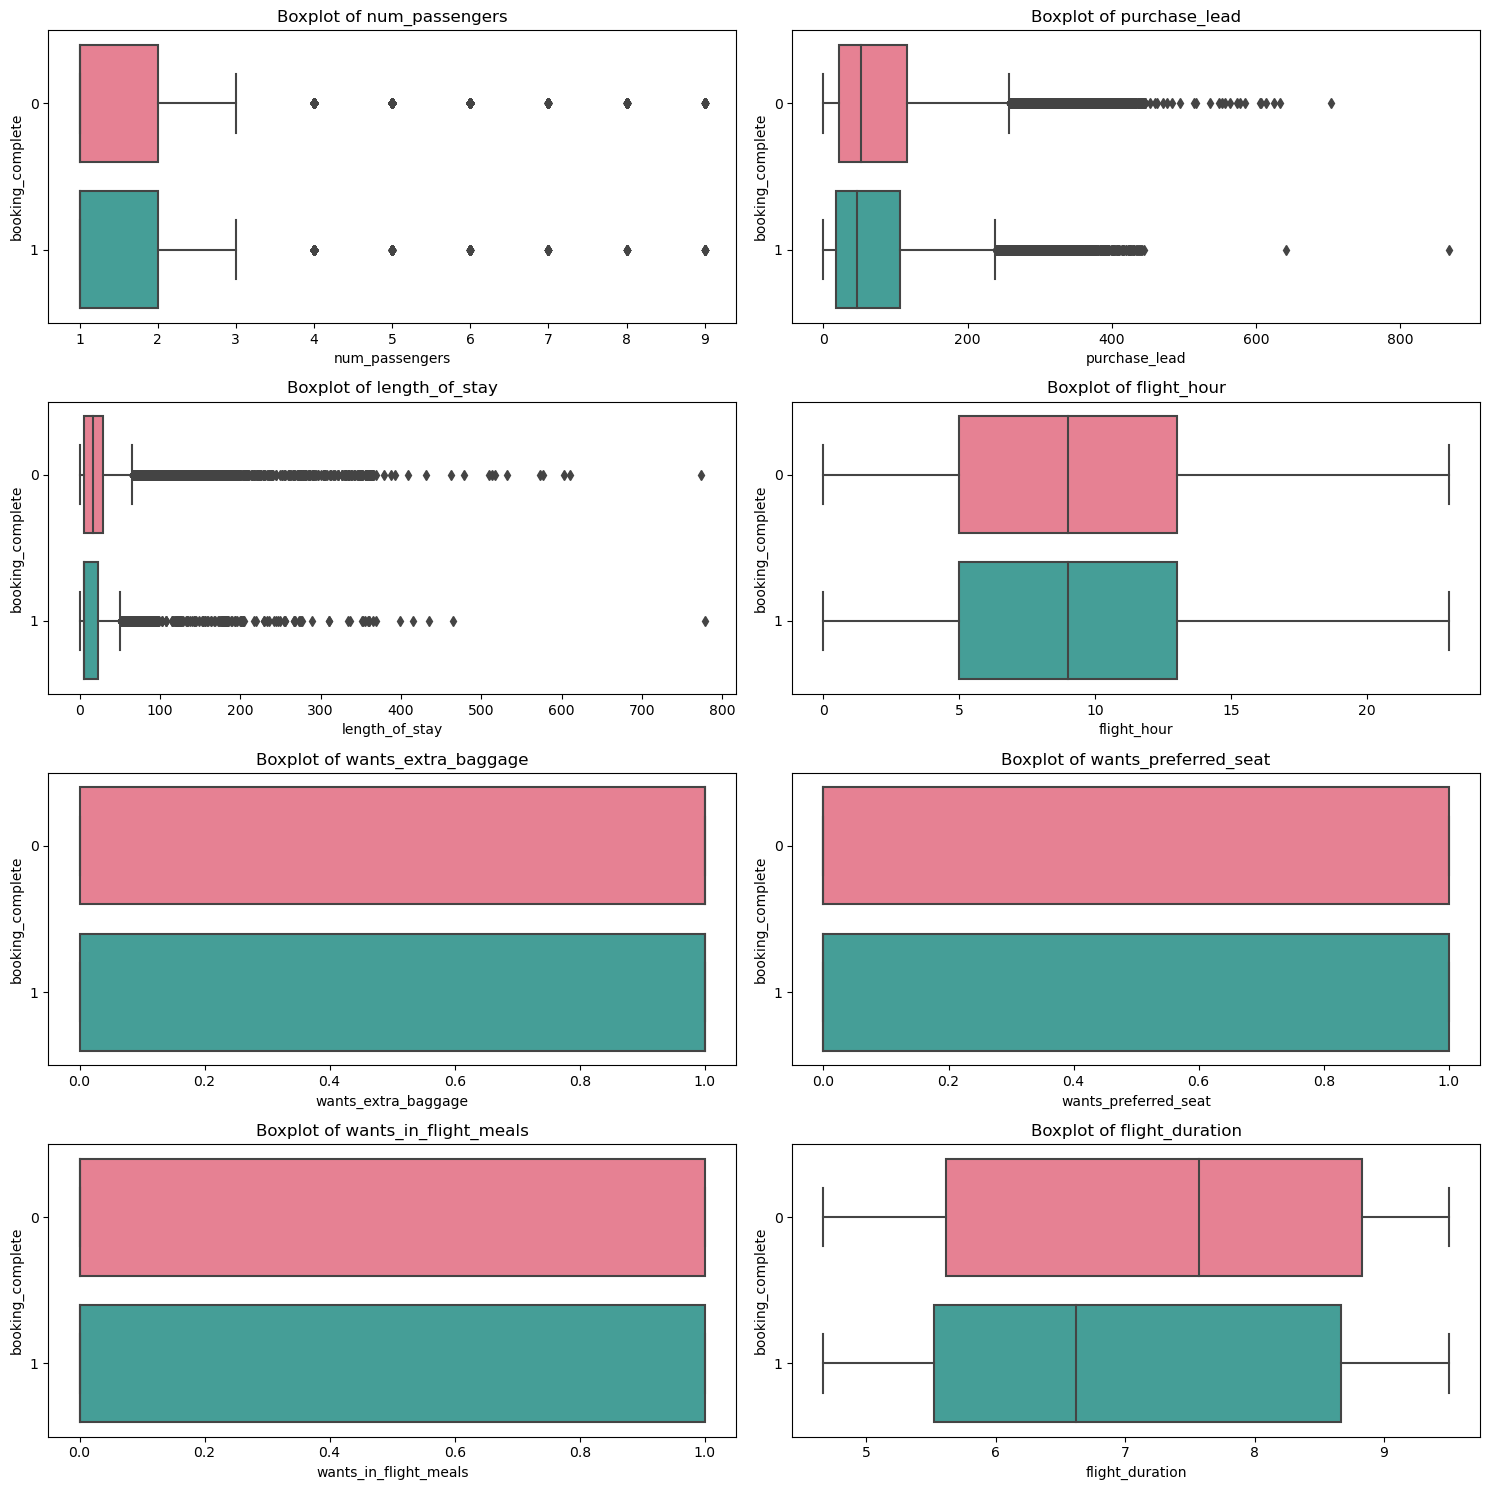

In [38]:
#Boxplot with hue booking_complete

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

nums_bivariate = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
palette = sns.color_palette("husl", df['booking_complete'].nunique())


for i in range(len(nums_bivariate)) :
  sns.boxplot(ax=axes[i], x=df[nums_bivariate[i]], y=df['booking_complete'], orient='h', color='skyblue', palette=palette)
  axes[i].set_title(f'Boxplot of {nums_bivariate[i]}')

plt.tight_layout()

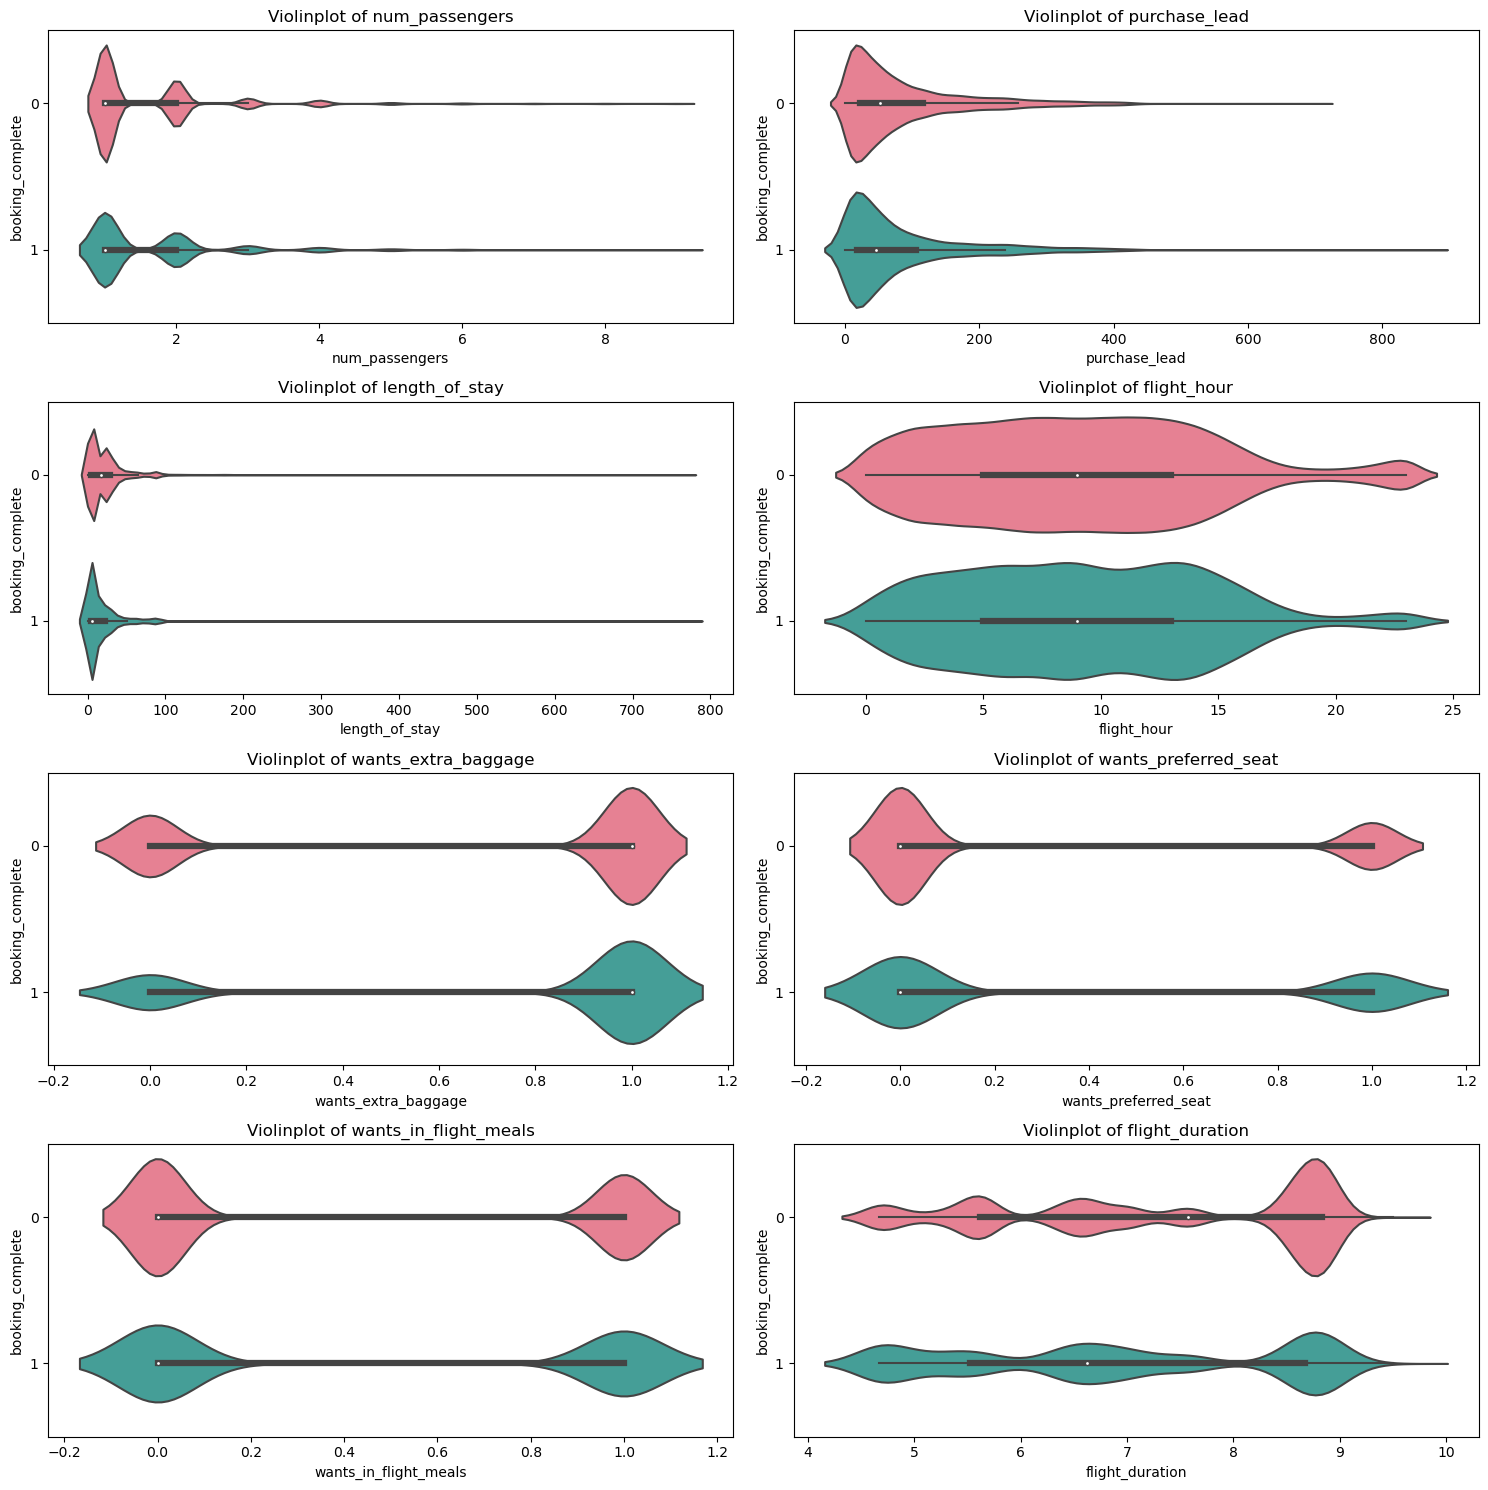

In [39]:
#Violinplot with hue booking_complete

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()

nums_bivariate = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
palette = sns.color_palette("husl", df['booking_complete'].nunique())


for i in range(len(nums_bivariate)) :
  sns.violinplot(ax=axes[i], x=df[nums_bivariate[i]], y=df['booking_complete'], orient='h', color='skyblue', palette=palette)
  axes[i].set_title(f'Violinplot of {nums_bivariate[i]}')

plt.tight_layout()

The overall distribution for each feature are quite the same in terms of booking completed or not; only some features have a little more density on some values in booking not completed than completed, but this is related to findings in univariate of booking_complete

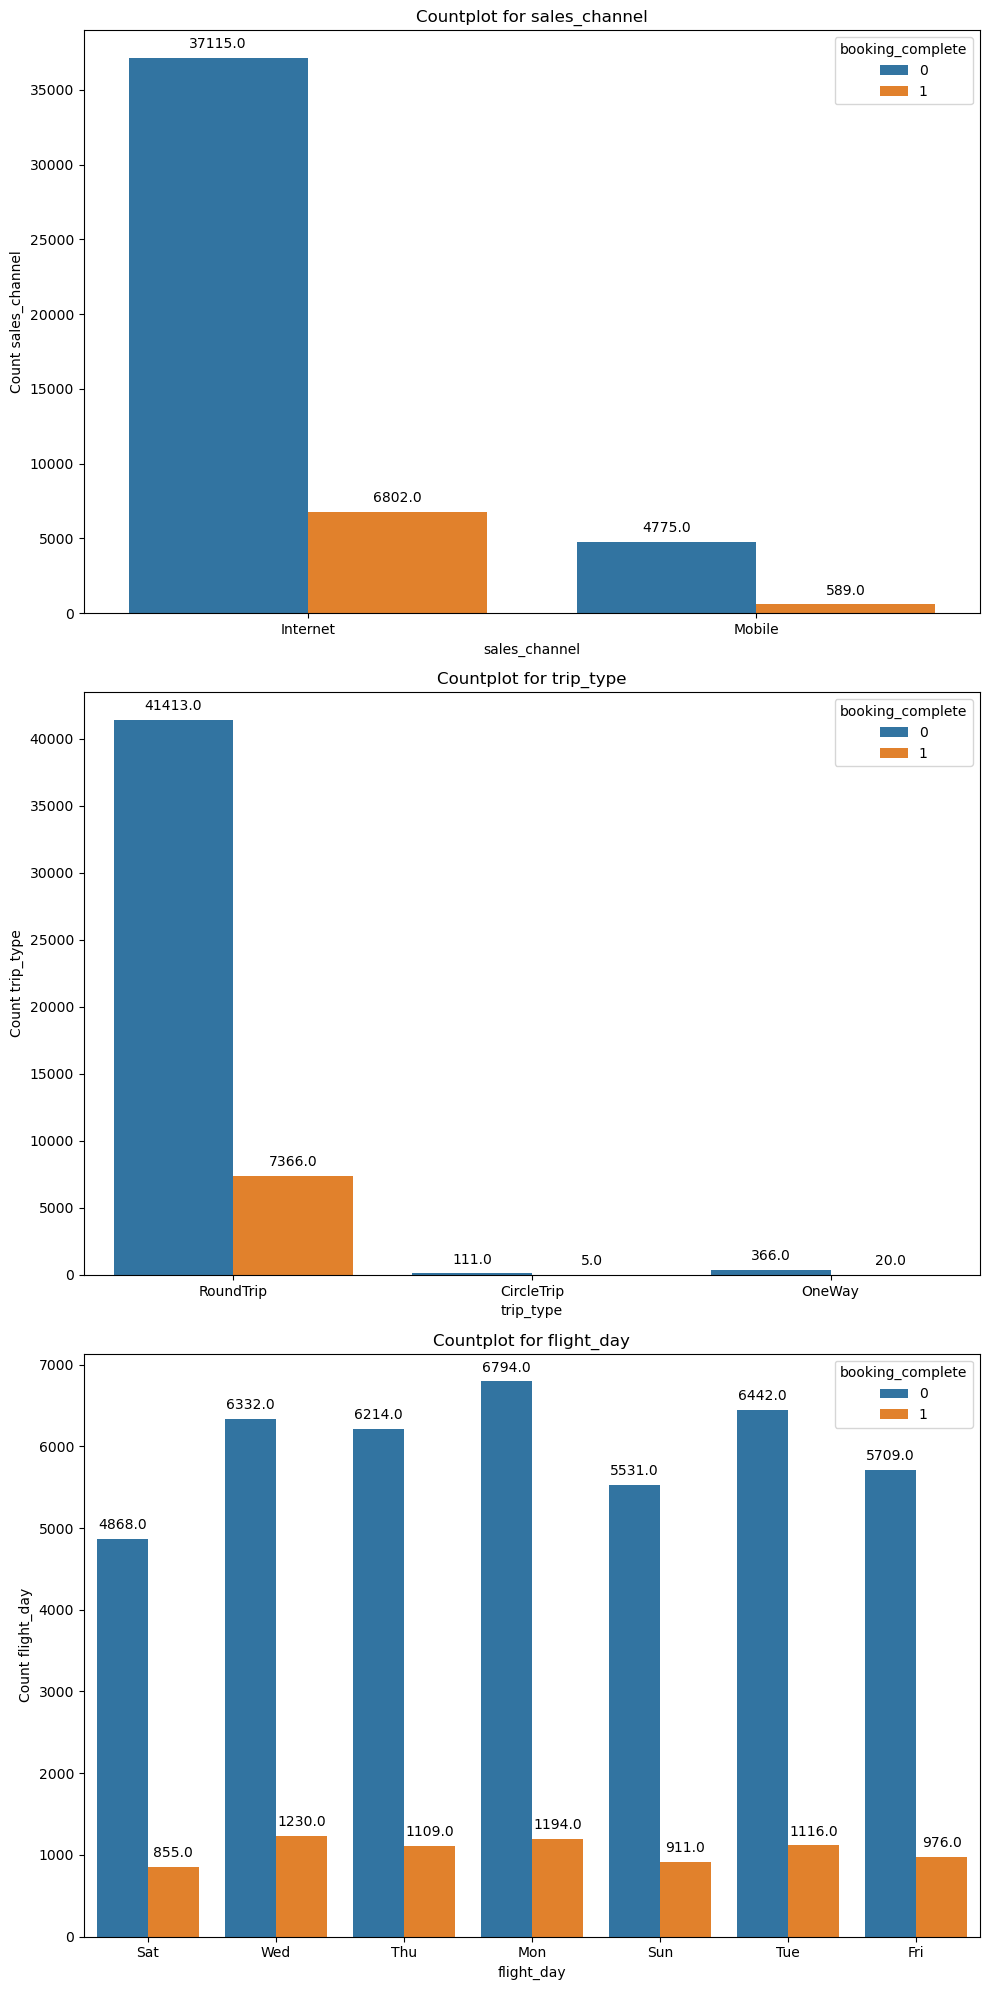

In [32]:
#Categorical Countplot (few unique values) with hue booking_complete
cats_few = ['sales_channel', 'trip_type', 'flight_day']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(cats_few)):
    ax = sns.countplot(ax=axes[i], x=df[cats_few[i]], hue=df['booking_complete'])
    axes[i].set_title(f'Countplot for {cats_few[i]}')
    axes[i].set_ylabel(f'Count {cats_few[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

The imbalance for sales_channel and trip_type are still the same, but there is something interesting here about the flight_day that we can't see in univariate; that is the customers that completes the booking are actually far less than those who dont. This is in line or related to the original booking_complete univariate analysis

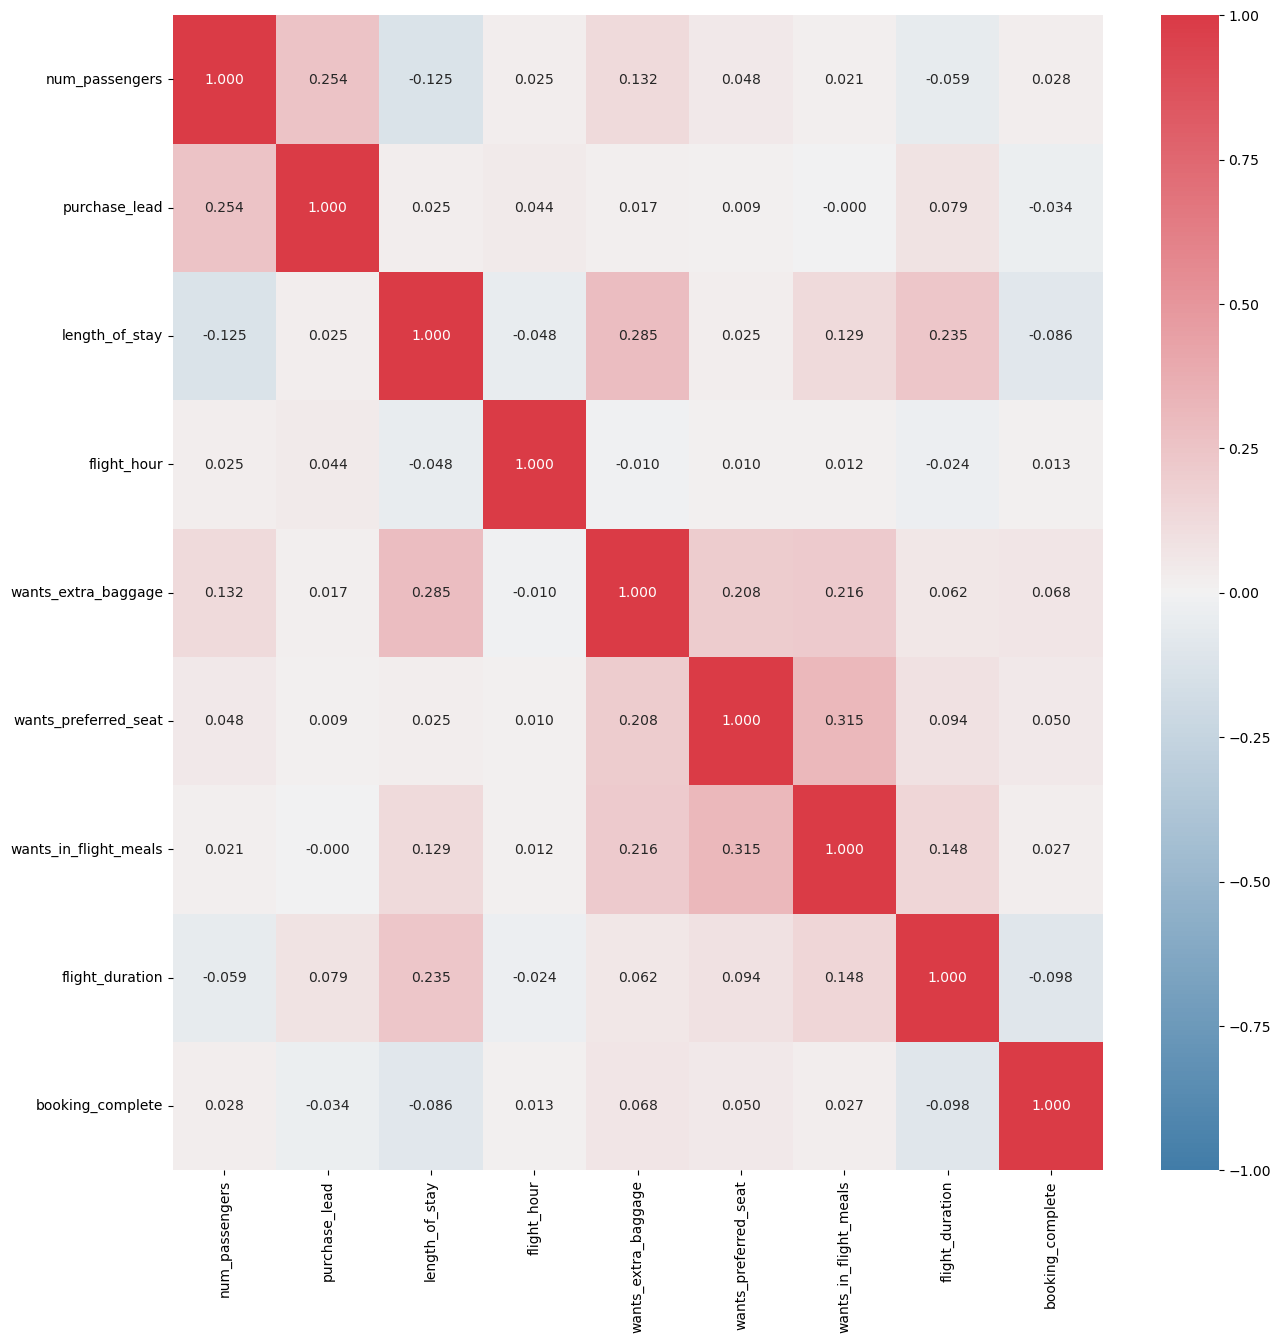

In [23]:
# Heatmap
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case we use the spearmann method because it is a non-parametric method used when the relationship between variables is monotonic but not necessarily linear. It can be applied to ordinal, interval, or ratio data; compared to pearson correlation that assumes that the variables are normally distributed and have a linear relationship. In this method we can see that flight_duration and lenght_of_stay are the two feature with the highest correlation

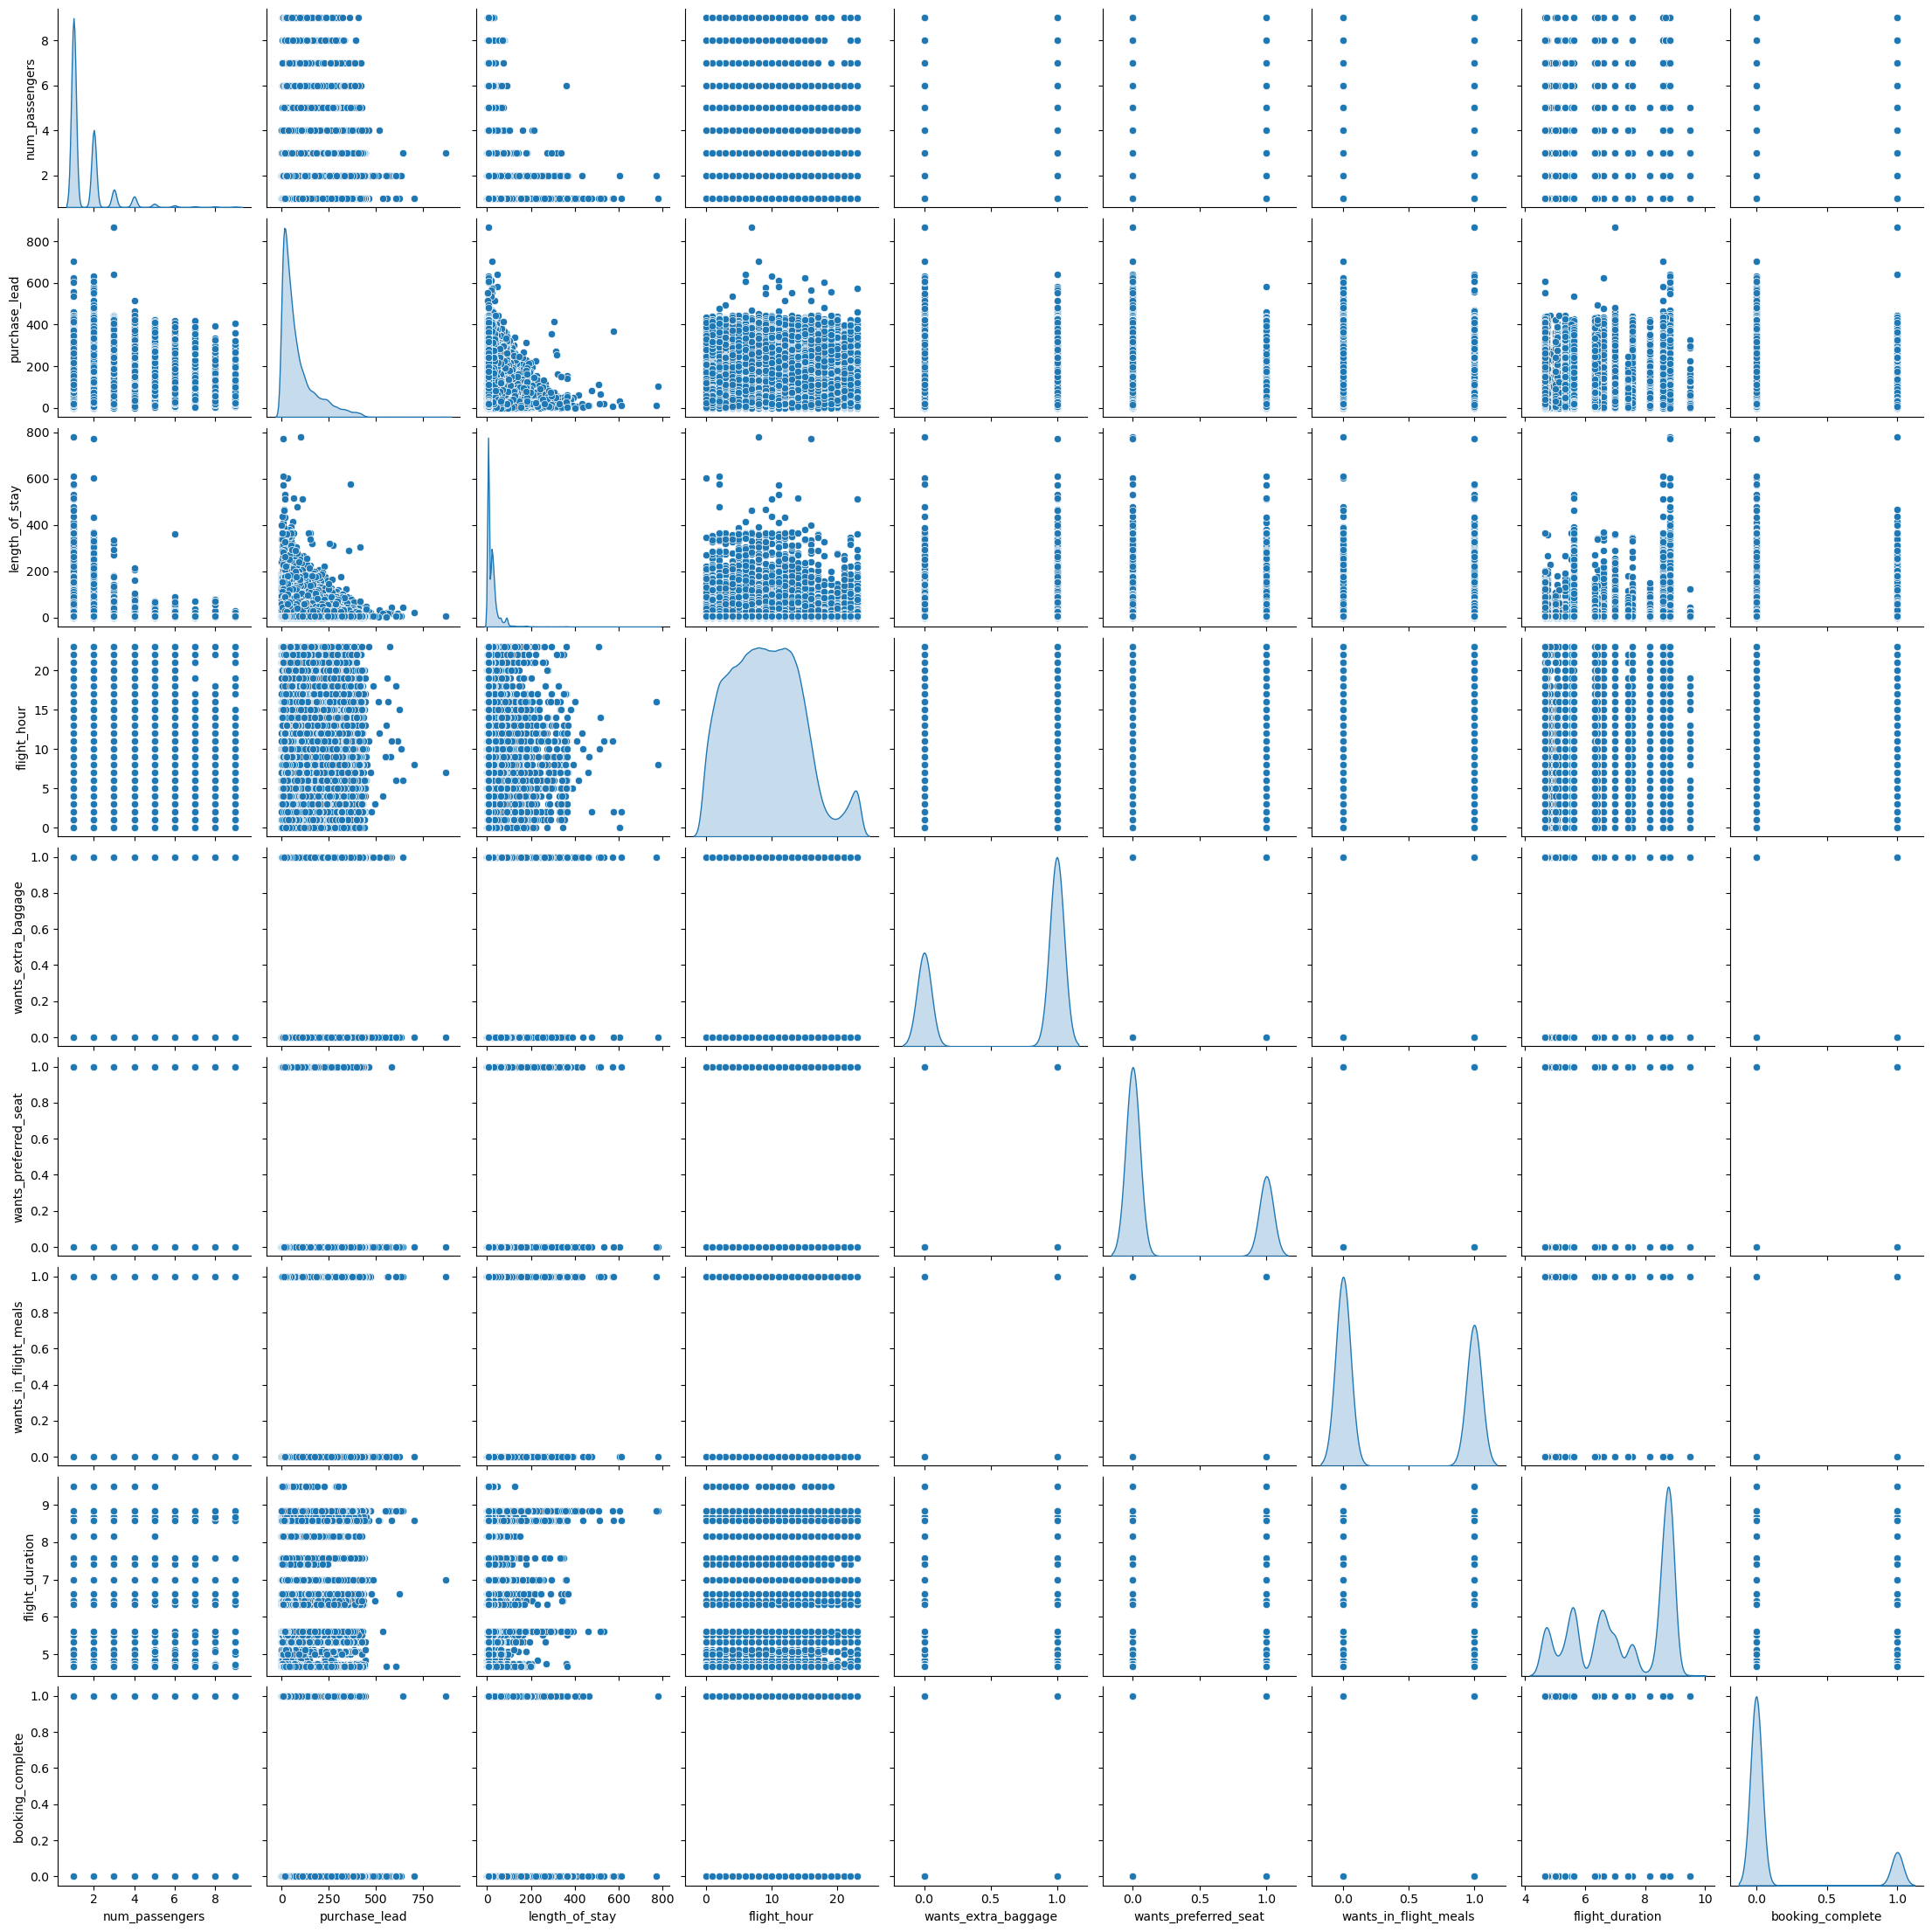

In [24]:
# Pairplot
sns.pairplot(data=df, diag_kind='kde')
plt.show()

The distribution of feature values related to target (booking_complete) are scattered in a non-linear distribution, so we might better use SelectKBest to see the feature importance for more information. This will be done after we do pre-processing

# Feature Engineering

**Additional information to remember about encoding**

The choice between label encoding and one-hot encoding depends on the nature of the data, specifically whether it is nominal or ordinal. Here's a general guideline:

1. **Label Encoding:**
   - **Use Case:** Label encoding is suitable for ordinal data, where there is a clear order or ranking among the categories.
   - **How it works:** It assigns integer values to categories based on their order.
   - **Example:** If you have ordinal data like "low," "medium," and "high," you can assign them values like 1, 2, and 3.

2. **One-Hot Encoding:**
   - **Use Case:** One-hot encoding is suitable for nominal data, where categories have no inherent order or ranking.
   - **How it works:** It creates binary columns for each category, where each column represents the presence or absence of a category.
   - **Example:** For nominal data like colors (e.g., red, blue, green), one-hot encoding would create three binary columns, each representing the presence or absence of a specific color.

   In summary, use label encoding when dealing with ordinal data, where there is a meaningful order among categories. Use one-hot encoding for nominal data when the categories have no inherent order. It's essential to choose the appropriate encoding method to avoid introducing unintended relationships or biases into your models based on the encoding choices.

3. **Frequency Encoding:**

   Frequency encoding is a technique where you encode categorical variables based on the frequency or occurrence of each category in the dataset. Unlike label encoding or one-hot encoding, frequency encoding assigns each category a numerical value proportional to its frequency. This method can be used with both nominal and ordinal data, and its suitability depends on the characteristics of the categorical variable.

   Here are some considerations:

   1. **Nominal Data:**
      - Frequency encoding can be applied to nominal data when you want to represent the importance or prevalence of each category based on its frequency in the dataset.
      - It provides a way to capture information about the distribution of categories in a dataset.

   2. **Ordinal Data:**
      - Frequency encoding can also be used with ordinal data if the ordinal categories have a meaningful relationship with their frequencies.
      - However, in cases where the order of categories is crucial, label encoding might be more appropriate.

   3. **Advantages:**
      - Frequency encoding can be beneficial when dealing with high-cardinality categorical features, as it reduces the dimensionality compared to one-hot encoding.
      - It can capture information about the distribution of categories, which may be useful in certain machine learning scenarios.

   4. **Considerations:**
      - Be cautious when applying frequency encoding if the dataset is imbalanced, as it may overemphasize the importance of infrequent categories.
      - Ensure that the encoding aligns with the underlying nature of the data and the goals of your analysis or modeling task.

   In summary, frequency encoding is a versatile technique that can be applied to both nominal and ordinal data. However, as with any encoding method, it's crucial to consider the characteristics of your data and the goals of your analysis when choosing the most appropriate encoding technique.

4. **Binary Encoding:**

   Binary encoding is another encoding technique commonly used for categorical variables. In binary encoding, each category is represented by its binary code. This method is particularly useful when dealing with nominal data. Here are some key points about binary encoding:

   1. **Nominal Data:**
      - Binary encoding is suitable for nominal data, where there is no inherent order among categories.
      - It encodes each category using binary digits (0s and 1s), creating a binary representation for each category.

   2. **Dimensionality Reduction:**
      - Binary encoding helps reduce dimensionality compared to one-hot encoding, which creates a binary column for each category.
      - The number of binary columns needed is log2(N), where N is the number of unique categories.

   3. **Example:**
      - Suppose you have three categories: A, B, and C. Binary encoding might represent them as 00, 01, and 10, respectively.
      - Each category is represented by a unique binary code, and the length of the binary code depends on the number of unique categories.

   4. **Advantages:**
      - Reduces the dimensionality of the dataset compared to one-hot encoding, making it more memory-efficient.
      - Retains some information about the relationships between categories, especially if there is a hierarchy or pattern in the binary codes.

   5. **Considerations:**
      - Like other encoding techniques, binary encoding assumes no inherent order among categories, so it is not suitable for ordinal data.
      - Care should be taken when dealing with high-cardinality features, as the length of the binary codes increases with the number of unique categories.

   In summary, binary encoding is a suitable choice for nominal data when you want to reduce dimensionality while retaining some information about the relationships between categories. As always, the choice of encoding method depends on the characteristics of your data and the requirements of your machine learning task.

In this case, we can use label encoding for sales_channel, frequency encoding for trip_type, route, and booking_origin. While one-hot encoding will be applied on flight_day feature

In [25]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sales_channel'] = le.fit_transform(df['sales_channel'])

In [26]:
#Frequency/Count Encoding
import category_encoders as ce

count_encoder = ce.CountEncoder() 

df['trip_type']= count_encoder.fit_transform(df['trip_type'])
df['route']= count_encoder.fit_transform(df['route'])
df['booking_origin']= count_encoder.fit_transform(df['booking_origin'])

In [27]:
#One-hot Encoding
onehots = pd.get_dummies(df['flight_day'], prefix='day')
onehots = onehots.astype(int)
df = df.join(onehots)

#Drop the Profession_Group after one-hot encoding
df = df.drop(columns=['flight_day'])

# Modelling

In [28]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2,0,49497,262,19,7,20,1074,1,0,0,5.52,0,False,False,True,False,False,False,False
1,1,0,49497,112,20,3,20,1074,0,0,0,5.52,0,False,False,True,False,False,False,False
2,2,0,49497,243,22,17,20,1270,1,1,0,5.52,0,False,False,False,False,False,False,True
3,1,0,49497,96,31,4,20,1074,0,0,1,5.52,0,False,False,True,False,False,False,False
4,2,0,49497,68,22,15,20,1270,1,0,1,5.52,0,False,False,False,False,False,False,True


In [29]:
#Train test split
x = df.drop(columns=['booking_complete'])
y = df[['booking_complete']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Scaling

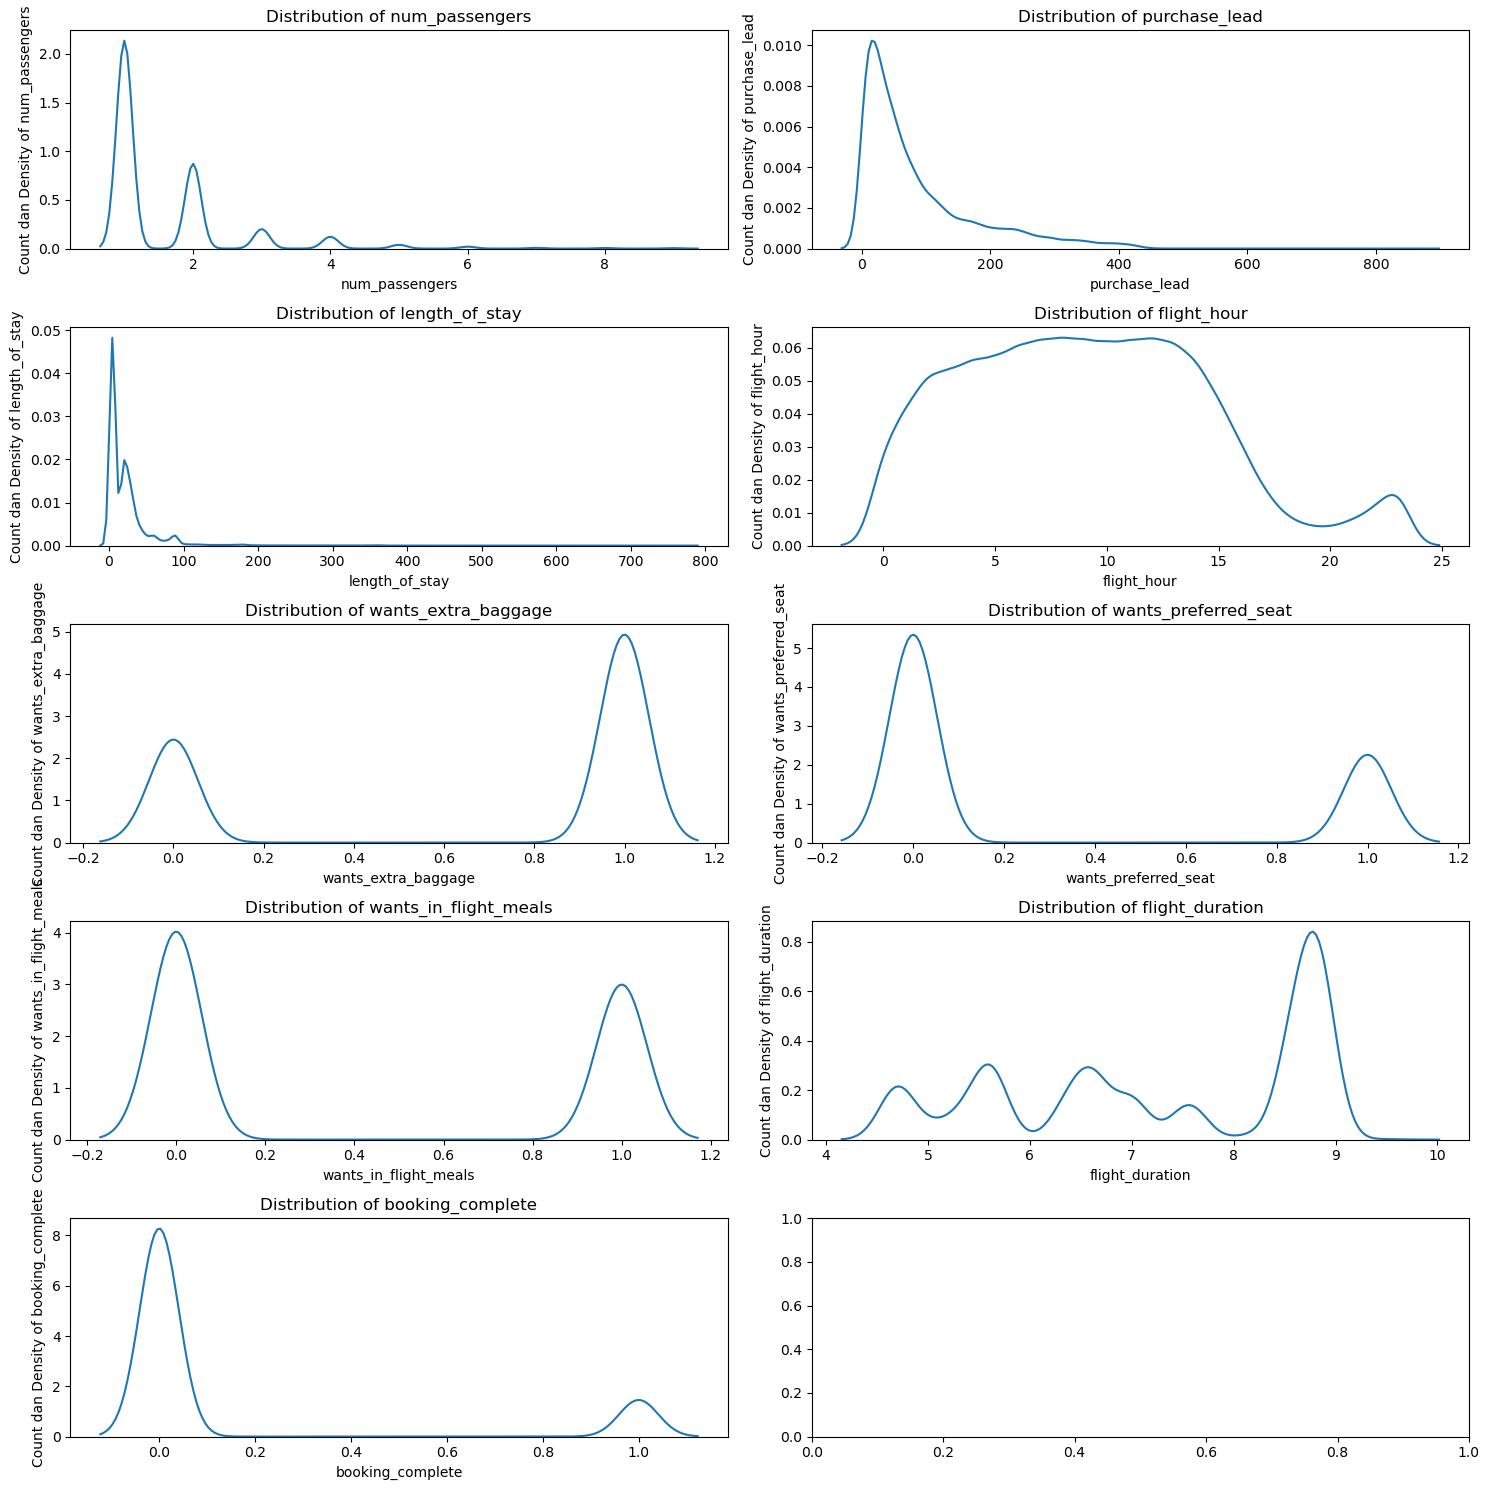

In [30]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

In [31]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

scale_features = df[columns_to_scale]
for n in scale_features:
  df[n] = ms.fit_transform(df[[n]])
  # scaler.to_pickle(filename)

In [32]:
# #Standardization
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# columns_to_scale = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# scale_features = df[columns_to_scale]
# for n in scale_features:
#   df[n] = ss.fit_transform(df[[n]])
#   # scaler.to_pickle(filename)

In [33]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'route', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'day_Fri', 'day_Mon', 'day_Sat',
       'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed'],
      dtype='object')

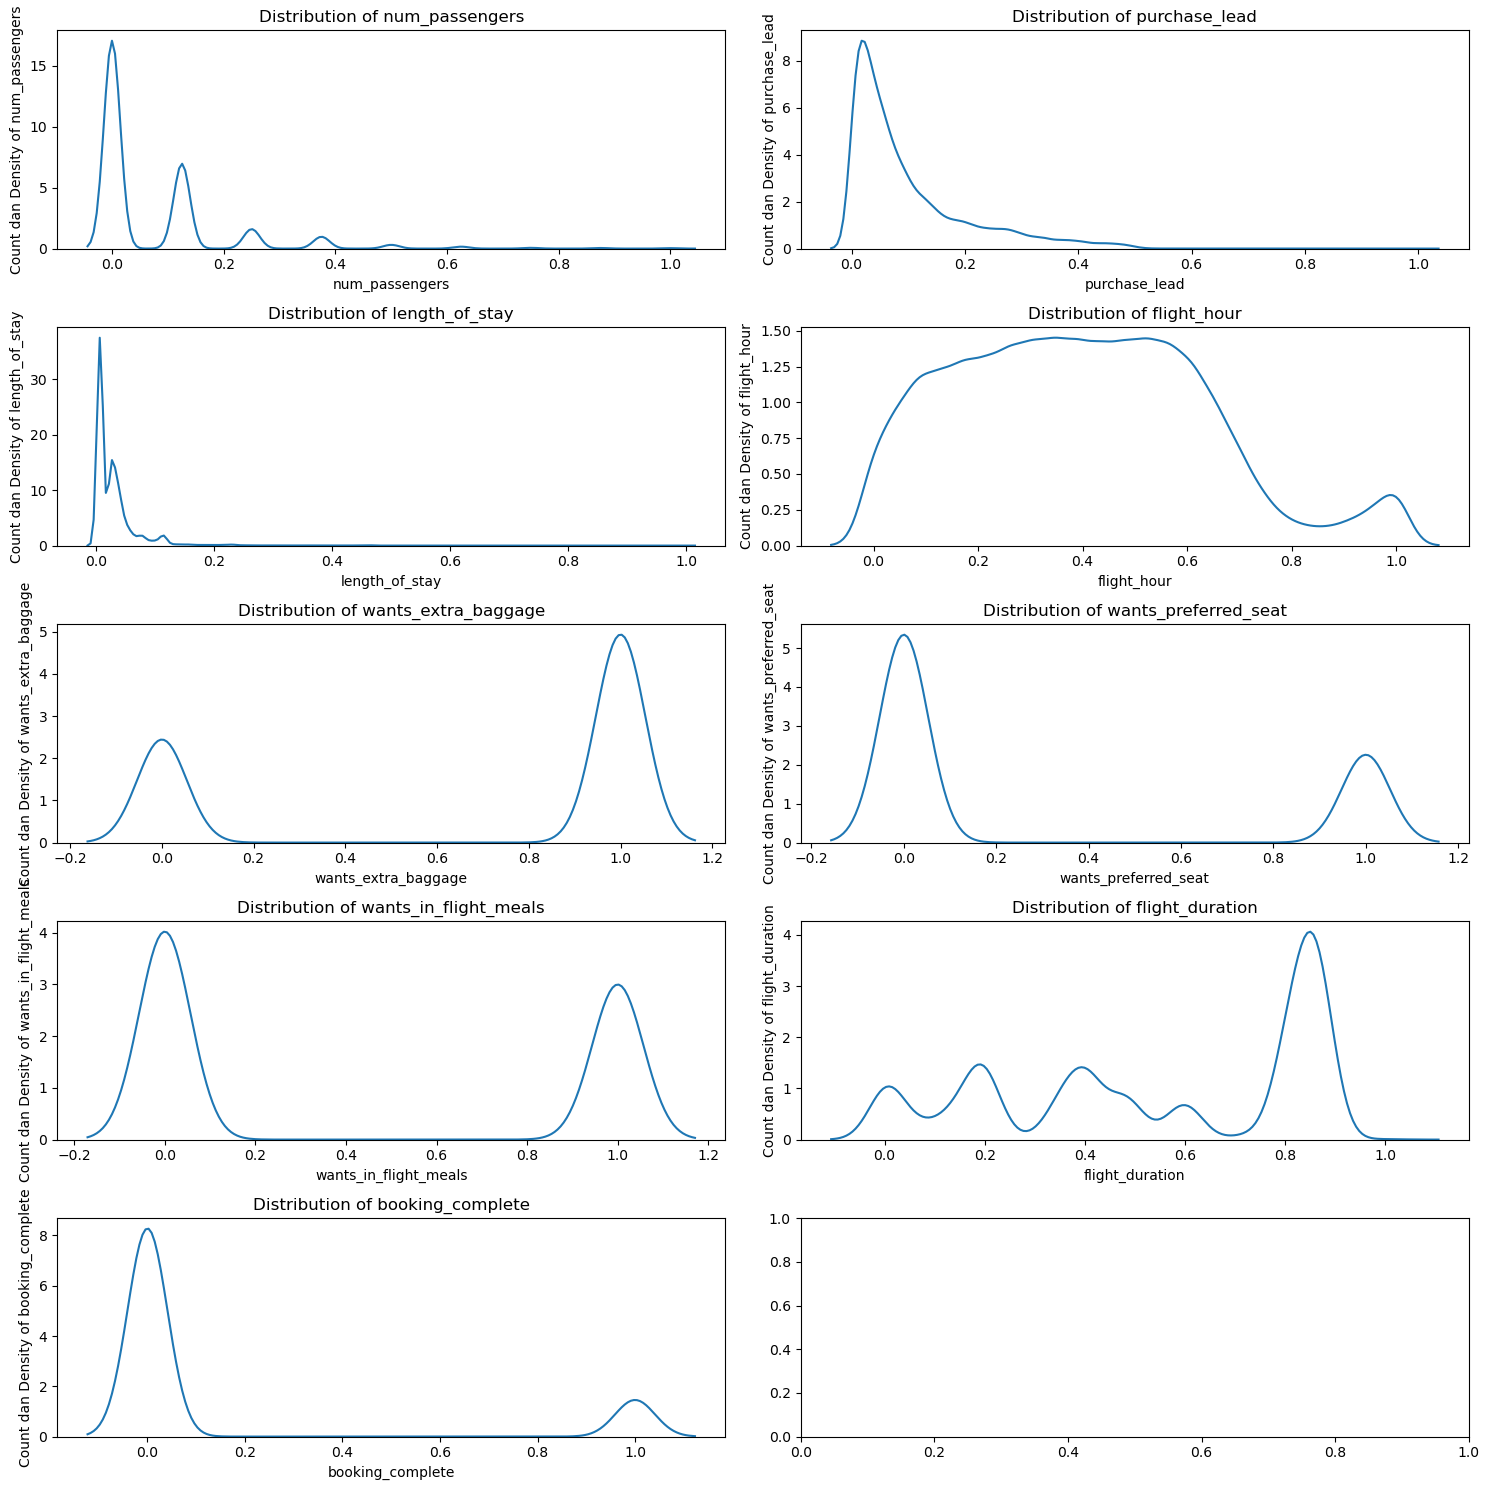

In [34]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.kdeplot(ax=axes[i], x=df[nums[i]])
  axes[i].set_title(f'Distribution of {nums[i]}')
  axes[i].set_ylabel(f'Count dan Density of {nums[i]}')
  axes[i].set_xlabel(f'{nums[i]}')

plt.tight_layout()

# Feature Selection

In [35]:
# Re-arrange the columns (views in last)
df_1 = df.drop(columns='booking_complete')
df_2 = df['booking_complete']
df = pd.concat([df_1, df_2], axis='columns')

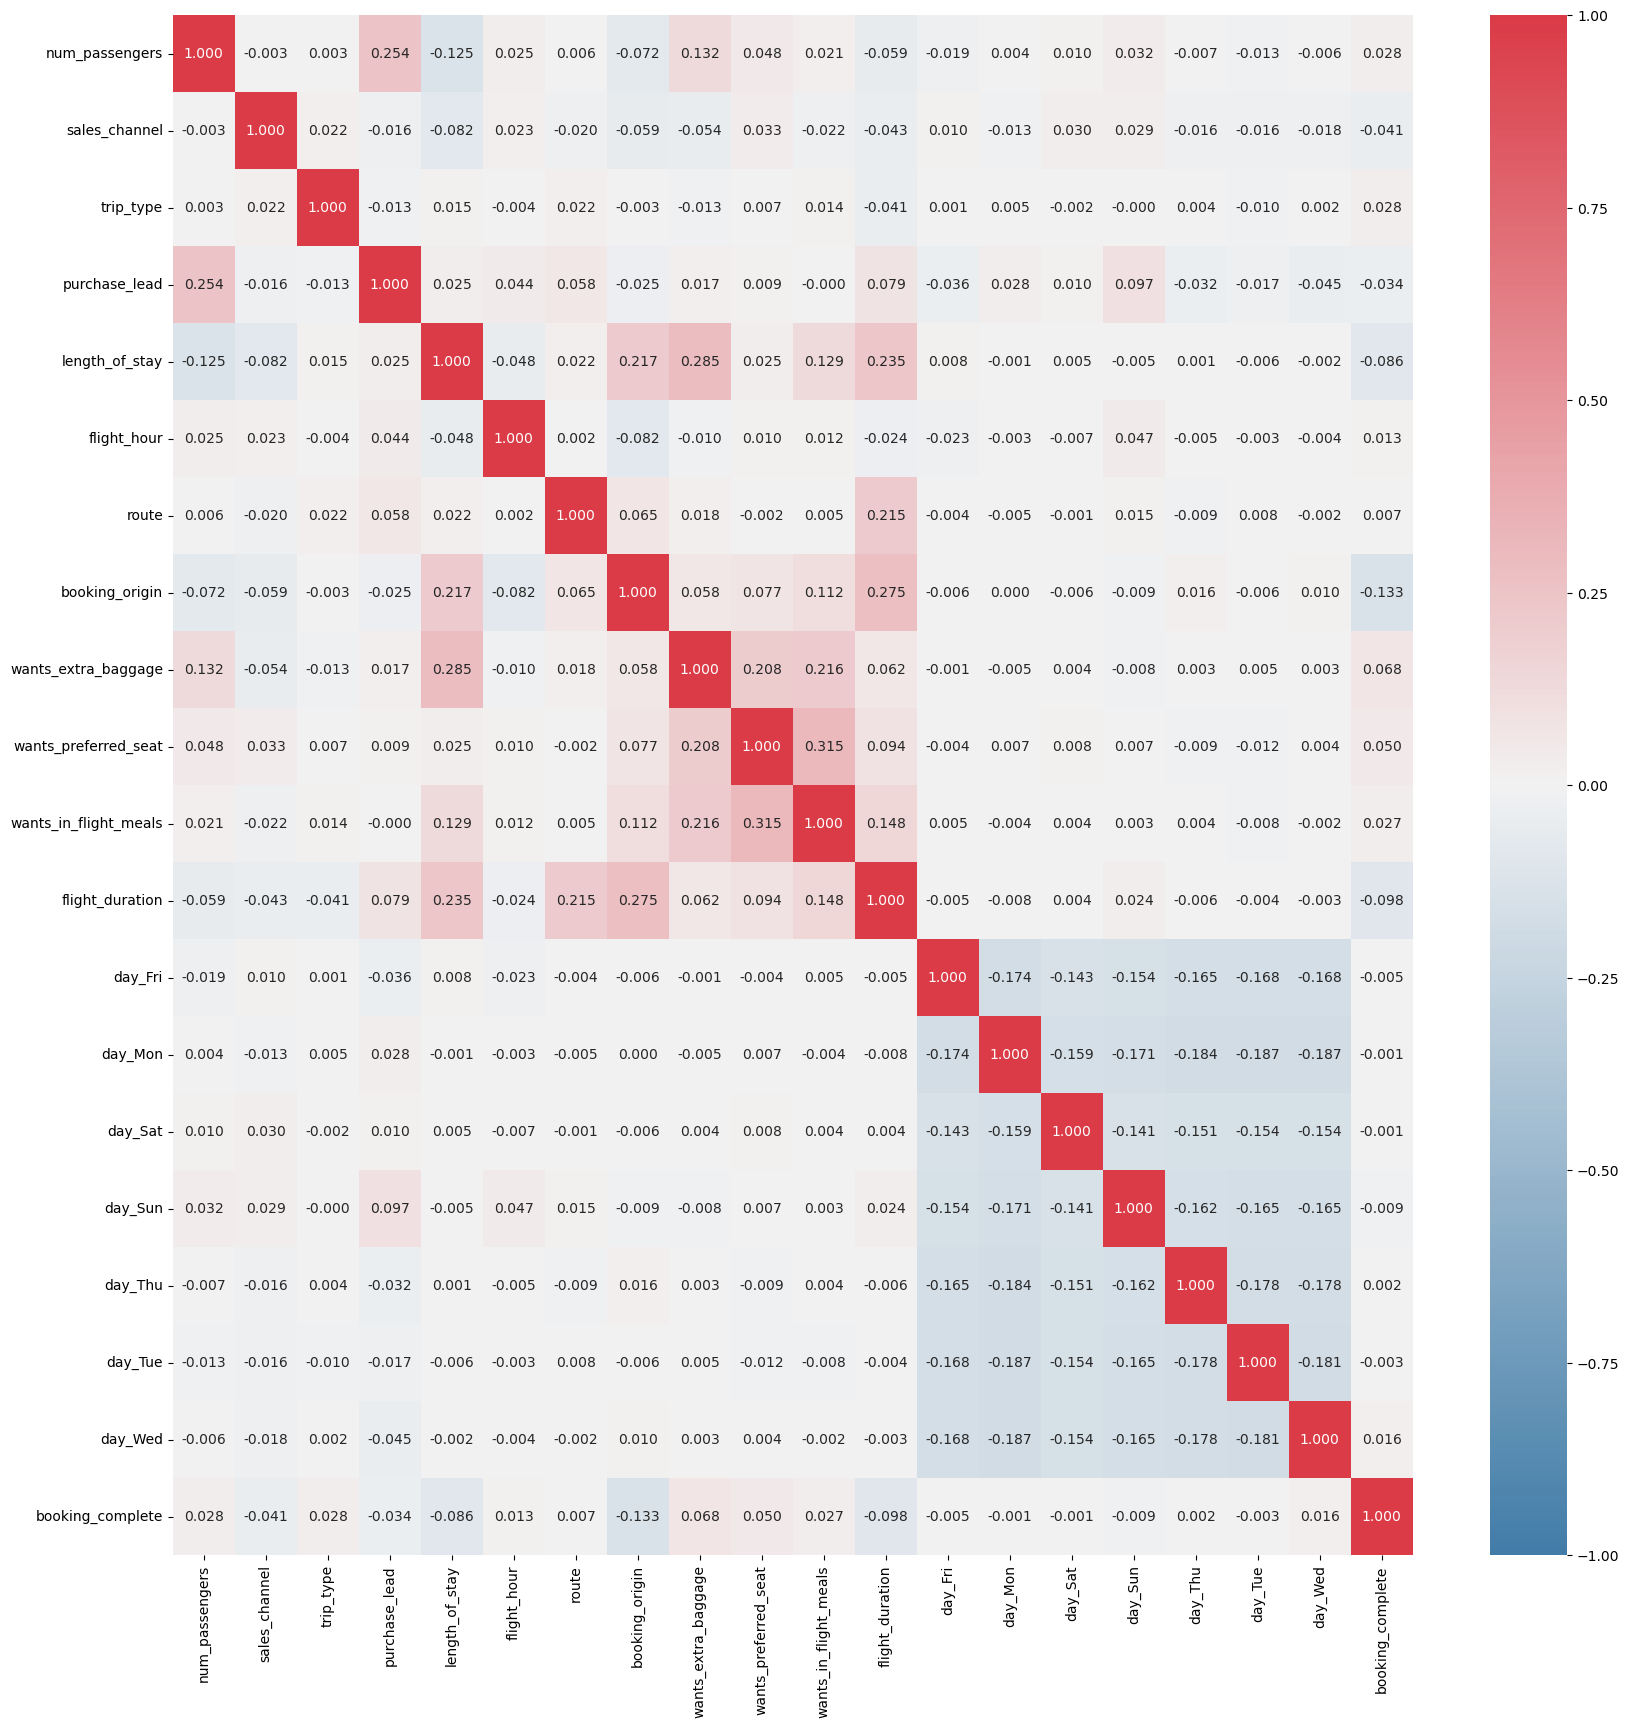

In [36]:
# Heatmap
plt.figure(figsize=(20,20))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [37]:
# Create temporary dataframe for testing SelectKBest

df_feature_target_relation = df.copy()
df_feature_target_relation.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,booking_complete
0,0.125,0,49497,0.302191,0.024422,0.304348,20,1074,1,0,0,0.175983,False,False,True,False,False,False,False,0
1,0.000,0,49497,0.129181,0.025707,0.130435,20,1074,0,0,0,0.175983,False,False,True,False,False,False,False,0
2,0.125,0,49497,0.280277,0.028278,0.739130,20,1270,1,1,0,0.175983,False,False,False,False,False,False,True,0
3,0.000,0,49497,0.110727,0.039846,0.173913,20,1074,0,0,1,0.175983,False,False,True,False,False,False,False,0
4,0.125,0,49497,0.078431,0.028278,0.652174,20,1270,1,0,1,0.175983,False,False,False,False,False,False,True,0


In [38]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['booking_complete'])  # Features
y_target_test = df_feature_target_relation['booking_complete']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

                  Feature     Score
7          booking_origin  0.050077
6                   route  0.038854
11        flight_duration  0.018023
2               trip_type  0.008650
8     wants_extra_baggage  0.007510
4          length_of_stay  0.006318
14                day_Sat  0.004874
9    wants_preferred_seat  0.003147
16                day_Thu  0.002905
0          num_passengers  0.002592
17                day_Tue  0.002588
18                day_Wed  0.002385
10  wants_in_flight_meals  0.001941
3           purchase_lead  0.001013
1           sales_channel  0.001012
5             flight_hour  0.000769
15                day_Sun  0.000288
12                day_Fri  0.000000
13                day_Mon  0.000000


In [39]:
#Calculation of feature importance score to target (categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['booking_complete'])  # Features
y_target_test = df_feature_target_relation['booking_complete']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

                  Feature         Score
7          booking_origin  8.431898e+06
6                   route  5.968522e+04
2               trip_type  1.957831e+04
11        flight_duration  1.004462e+02
9    wants_preferred_seat  8.828809e+01
8     wants_extra_baggage  7.689035e+01
1           sales_channel  7.482389e+01
10  wants_in_flight_meals  2.013096e+01
18                day_Wed  1.114019e+01
0          num_passengers  6.398332e+00
4          length_of_stay  5.759595e+00
15                day_Sun  3.397213e+00
3           purchase_lead  2.720506e+00
12                day_Fri  9.231297e-01
5             flight_hour  3.568401e-01
17                day_Tue  3.534931e-01
16                day_Thu  1.441413e-01
14                day_Sat  9.190864e-02
13                day_Mon  5.806076e-02


# Train Classification Models

In [40]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(x_train, y_train) # fit model regression dari data train

LogisticRegression()

In [41]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(x_train, y_train) # fit model KNN dari data train

KNeighborsClassifier()

In [42]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(x_train, y_train) # fit model decision tree dari data train

DecisionTreeClassifier()

In [43]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# xgboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Evaluate Classification Models

The metric you are specifically interested in improving, which focuses on increasing the number of customers who complete the booking (class 1), is generally associated with the concept of **Recall** in binary classification problems. Specifically, you want to increase the True Positive Rate or Sensitivity.

### Recall (Sensitivity):

- **Definition:** Recall is the ratio of true positive predictions to the total actual positives (actual bookings completed). It is also known as Sensitivity or True Positive Rate.

- **Importance:** Recall measures the ability of the model to capture all positive instances. In the context of predicting completed bookings, a high recall implies that the model is effective in identifying and capturing a significant portion of customers who eventually complete their bookings.

### Strategies to Improve Recall:

1. **Adjust Prediction Threshold:**
   - Depending on the model's output probabilities, you can adjust the threshold for classifying instances as positive. Lowering the threshold may increase the recall, but it could lead to more false positives.

2. **Feature Engineering:**
   - Identify and incorporate additional features that might provide more information about the customers who are likely to complete bookings. This may include historical booking behavior, preferences, or engagement patterns.

3. **Model Selection and Tuning:**
   - Experiment with different classification algorithms and hyperparameter tuning to find a model that better captures the patterns associated with completed bookings.

4. **Address Class Imbalance:**
   - If there is a significant class imbalance (i.e., more instances of class 0 than class 1), consider techniques like oversampling the minority class (completed bookings) or using algorithms that handle imbalanced datasets well.

5. **Feature Importance Analysis:**
   - Analyze the importance of each feature in the model and focus on those that contribute the most to predicting completed bookings. This can guide efforts in enhancing the significance of key predictors.

6. **Behavioral Analysis:**
   - Understand the behaviors and characteristics of customers who complete bookings. Tailor marketing strategies or incentives to align with the preferences and needs of these customers.

7. **Personalized Marketing:**
   - Implement personalized marketing campaigns based on the insights gained from the model to target potential customers who are more likely to complete bookings.

Remember, while increasing recall is important for capturing more positive instances, it may come at the cost of precision (increasing false positives). Striking the right balance depends on the specific business objectives and the acceptable trade-offs between true positives and false positives in the context of completed bookings.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    
    # #Cross Validation
    # score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    # print('recall (crossval train): '+ str(score['train_score'].mean()))
    # print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [46]:
print('Evaluate LogisticRegression')
eval_classification(logreg)
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

print('\nEvaluate RandomForestClassifier')
eval_classification(rf)
print('\nEvaluate XGBClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy (Test Set): 0.85
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.62
roc_auc (train-proba): 0.63

Evaluate KNeighborsClassifier
Accuracy (Test Set): 0.83
Precision (Test Set): 0.35
Recall (Test Set): 0.18
F1-Score (Test Set): 0.24
roc_auc (test-proba): 0.67
roc_auc (train-proba): 0.89

Evaluate DecisionTreeClassifier
Accuracy (Test Set): 0.78
Precision (Test Set): 0.28
Recall (Test Set): 0.31
F1-Score (Test Set): 0.29
roc_auc (test-proba): 0.59
roc_auc (train-proba): 1.00

Evaluate RandomForestClassifier
Accuracy (Test Set): 0.85
Precision (Test Set): 0.55
Recall (Test Set): 0.09
F1-Score (Test Set): 0.16
roc_auc (test-proba): 0.75
roc_auc (train-proba): 1.00

Evaluate XGBClassifier
Accuracy (Test Set): 0.85
Precision (Test Set): 0.46
Recall (Test Set): 0.12
F1-Score (Test Set): 0.20
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.92


The two best models for this case is random forest and xgboost classifier, for further improvement we can do hyperparameter tuning